## Regression

In [1]:
import time
import numpy as np
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lvxnn.LVXNN import LV_XNN
from sklearn.metrics.pairwise import cosine_similarity
from gaminet.utils import local_visualize
from gaminet.utils import global_visualize_density
from gaminet.utils import feature_importance_visualize
from gaminet.utils import plot_trajectory
from gaminet.utils import plot_regularization
from sklearn.linear_model import LinearRegression
from lvxnn.DataReader import data_initialize
from collections import OrderedDict

In [2]:
data= pd.read_csv('data/simulation/sim_0.9.csv')
train , test = train_test_split(data,test_size=0.2)

#list1 = data.columns
meta_info = OrderedDict()

meta_info['uf_1']={'type': 'continues','source':'user'}
meta_info['uf_2']={'type': 'continues','source':'user'}
meta_info['uf_3']={'type': 'continues','source':'user'}
meta_info['uf_4']={'type': 'continues','source':'user'}
meta_info['uf_5']={'type': 'continues','source':'user'}
meta_info['if_1']={'type': 'continues','source':'item'}
meta_info['if_2']={'type': 'continues','source':'item'}
meta_info['if_3']={'type': 'continues','source':'item'}
meta_info['if_4']={'type': 'continues','source':'item'}
meta_info['if_5']={'type': 'continues','source':'item'}
#meta_info['Occupation']={"type":"categorical"}
#meta_info['Genres']={"type":"categorical"}
#meta_info['Gender']={"type":"categorical"}
#meta_info['Age'] = {"type":"continues"}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}


tr_x, tr_Xi, tr_y , te_x , te_Xi, te_y, meta_info, model_info = data_initialize(train,test,meta_info,"Regression")

In [3]:
model = LV_XNN(model_info=model_info, meta_info=meta_info, subnet_arch=[8, 16],interact_arch=[20, 10],activation_func=tf.tanh, batch_size=1000, lr_bp=0.01, auto_tune=True,
               interaction_epochs=200,main_effect_epochs=300,tuning_epochs=50,loss_threshold_main=0.01,loss_threshold_inter=0.01,alpha=0.5,
              verbose=True,val_ratio=0.125, early_stop_thres=100,interact_num=10,u_group_num=10,i_group_num=20,scale_ratio=0.7,n_power_iterations=5,n_oversamples=0,
              mf_training_iters=300,mf_tuning_iters=100,change_mode=True,convergence_threshold=0.001,max_rank=3,shrinkage_value=20)

In [4]:
st_time = time.time()
model.fit(tr_x,tr_Xi, tr_y)
ed_time = time.time()

ListWrapper(['uf_1', 'uf_2', 'uf_3', 'uf_4', 'uf_5', 'if_1', 'if_2', 'if_3', 'if_4', 'if_5'])
####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 4.05496, val loss: 3.91269
Main effects training epoch: 2, train loss: 3.88169, val loss: 3.72957
Main effects training epoch: 3, train loss: 3.68822, val loss: 3.54599
Main effects training epoch: 4, train loss: 3.54925, val loss: 3.42417
Main effects training epoch: 5, train loss: 3.44887, val loss: 3.29797
Main effects training epoch: 6, train loss: 3.38536, val loss: 3.20804
Main effects training epoch: 7, train loss: 3.28462, val loss: 3.11806
Main effects training epoch: 8, train loss: 3.31703, val loss: 3.14760
Main effects training epoch: 9, train loss: 3.31091, val loss: 3.13459
Main effects training epoch: 10, train loss: 3.16239, val loss: 2.98054
Main effects training epoch: 11, train loss: 3.13077, val loss: 2.95334
M

Main effects training epoch: 117, train loss: 1.61950, val loss: 1.61326
Main effects training epoch: 118, train loss: 1.61499, val loss: 1.61293
Main effects training epoch: 119, train loss: 1.61619, val loss: 1.60596
Main effects training epoch: 120, train loss: 1.61426, val loss: 1.61204
Main effects training epoch: 121, train loss: 1.61493, val loss: 1.60364
Main effects training epoch: 122, train loss: 1.61284, val loss: 1.60490
Main effects training epoch: 123, train loss: 1.60990, val loss: 1.59888
Main effects training epoch: 124, train loss: 1.60748, val loss: 1.59521
Main effects training epoch: 125, train loss: 1.60833, val loss: 1.59530
Main effects training epoch: 126, train loss: 1.60444, val loss: 1.59472
Main effects training epoch: 127, train loss: 1.60985, val loss: 1.60651
Main effects training epoch: 128, train loss: 1.60836, val loss: 1.58199
Main effects training epoch: 129, train loss: 1.60308, val loss: 1.59299
Main effects training epoch: 130, train loss: 1.600

Main effects training epoch: 234, train loss: 1.48483, val loss: 1.47063
Main effects training epoch: 235, train loss: 1.47719, val loss: 1.45668
Main effects training epoch: 236, train loss: 1.48186, val loss: 1.46382
Main effects training epoch: 237, train loss: 1.47642, val loss: 1.45498
Main effects training epoch: 238, train loss: 1.47965, val loss: 1.45240
Main effects training epoch: 239, train loss: 1.48117, val loss: 1.46973
Main effects training epoch: 240, train loss: 1.47151, val loss: 1.45478
Main effects training epoch: 241, train loss: 1.48532, val loss: 1.46582
Main effects training epoch: 242, train loss: 1.47694, val loss: 1.46762
Main effects training epoch: 243, train loss: 1.48281, val loss: 1.46558
Main effects training epoch: 244, train loss: 1.48188, val loss: 1.46409
Main effects training epoch: 245, train loss: 1.47168, val loss: 1.45965
Main effects training epoch: 246, train loss: 1.47250, val loss: 1.46737
Main effects training epoch: 247, train loss: 1.470

Main effects tuning epoch: 48, train loss: 1.43899, val loss: 1.42286
Main effects tuning epoch: 49, train loss: 1.44289, val loss: 1.43395
Main effects tuning epoch: 50, train loss: 1.43501, val loss: 1.43227
##########Stage 2: interaction training start.##########
Interaction training epoch: 1, train loss: 1.51831, val loss: 1.48798
Interaction training epoch: 2, train loss: 1.20770, val loss: 1.22761
Interaction training epoch: 3, train loss: 1.06557, val loss: 1.10465
Interaction training epoch: 4, train loss: 1.01290, val loss: 1.05475
Interaction training epoch: 5, train loss: 1.04805, val loss: 1.06150
Interaction training epoch: 6, train loss: 1.06134, val loss: 1.11578
Interaction training epoch: 7, train loss: 1.02838, val loss: 1.04794
Interaction training epoch: 8, train loss: 1.03209, val loss: 1.05513
Interaction training epoch: 9, train loss: 0.98077, val loss: 1.01129
Interaction training epoch: 10, train loss: 0.98634, val loss: 1.03656
Interaction training epoch: 11, 

Interaction training epoch: 115, train loss: 0.79424, val loss: 0.85540
Interaction training epoch: 116, train loss: 0.79196, val loss: 0.84645
Interaction training epoch: 117, train loss: 0.79514, val loss: 0.85363
Interaction training epoch: 118, train loss: 0.79651, val loss: 0.84653
Interaction training epoch: 119, train loss: 0.79685, val loss: 0.85054
Interaction training epoch: 120, train loss: 0.79466, val loss: 0.85386
Interaction training epoch: 121, train loss: 0.79699, val loss: 0.84872
Interaction training epoch: 122, train loss: 0.79392, val loss: 0.84583
Interaction training epoch: 123, train loss: 0.79160, val loss: 0.84732
Interaction training epoch: 124, train loss: 0.79984, val loss: 0.86148
Interaction training epoch: 125, train loss: 0.79232, val loss: 0.85108
Interaction training epoch: 126, train loss: 0.78856, val loss: 0.85114
Interaction training epoch: 127, train loss: 0.79004, val loss: 0.84350
Interaction training epoch: 128, train loss: 0.79291, val loss: 

Interaction tuning epoch: 31, train loss: 0.78347, val loss: 0.83873
Interaction tuning epoch: 32, train loss: 0.78199, val loss: 0.83774
Interaction tuning epoch: 33, train loss: 0.78281, val loss: 0.83254
Interaction tuning epoch: 34, train loss: 0.78253, val loss: 0.83957
Interaction tuning epoch: 35, train loss: 0.78345, val loss: 0.83665
Interaction tuning epoch: 36, train loss: 0.78540, val loss: 0.83868
Interaction tuning epoch: 37, train loss: 0.78714, val loss: 0.84545
Interaction tuning epoch: 38, train loss: 0.78673, val loss: 0.84323
Interaction tuning epoch: 39, train loss: 0.78676, val loss: 0.83935
Interaction tuning epoch: 40, train loss: 0.78802, val loss: 0.83859
Interaction tuning epoch: 41, train loss: 0.78715, val loss: 0.84595
Interaction tuning epoch: 42, train loss: 0.78962, val loss: 0.84138
Interaction tuning epoch: 43, train loss: 0.78738, val loss: 0.83619
Interaction tuning epoch: 44, train loss: 0.78316, val loss: 0.83666
Interaction tuning epoch: 45, trai

[SoftImpute] Iter 97: observed MAE=0.234392 validation MAE=0.450261,rank=3
[SoftImpute] Iter 98: observed MAE=0.233983 validation MAE=0.449590,rank=3
[SoftImpute] Iter 99: observed MAE=0.233585 validation MAE=0.448930,rank=3
[SoftImpute] Iter 100: observed MAE=0.233199 validation MAE=0.448277,rank=3
[SoftImpute] Iter 101: observed MAE=0.232824 validation MAE=0.447641,rank=3
[SoftImpute] Iter 102: observed MAE=0.232463 validation MAE=0.447018,rank=3
[SoftImpute] Iter 103: observed MAE=0.232111 validation MAE=0.446403,rank=3
[SoftImpute] Iter 104: observed MAE=0.231767 validation MAE=0.445814,rank=3
[SoftImpute] Iter 105: observed MAE=0.231430 validation MAE=0.445244,rank=3
[SoftImpute] Iter 106: observed MAE=0.231101 validation MAE=0.444685,rank=3
[SoftImpute] Iter 107: observed MAE=0.230782 validation MAE=0.444151,rank=3
[SoftImpute] Iter 108: observed MAE=0.230471 validation MAE=0.443625,rank=3
[SoftImpute] Iter 109: observed MAE=0.230167 validation MAE=0.443115,rank=3
[SoftImpute] It

[SoftImpute] Iter 207: observed MAE=0.216501 validation MAE=0.423257,rank=3
[SoftImpute] Iter 208: observed MAE=0.216425 validation MAE=0.423172,rank=3
[SoftImpute] Iter 209: observed MAE=0.216350 validation MAE=0.423089,rank=3
[SoftImpute] Iter 210: observed MAE=0.216275 validation MAE=0.423007,rank=3
[SoftImpute] Iter 211: observed MAE=0.216201 validation MAE=0.422924,rank=3
[SoftImpute] Iter 212: observed MAE=0.216127 validation MAE=0.422841,rank=3
[SoftImpute] Iter 213: observed MAE=0.216054 validation MAE=0.422761,rank=3
[SoftImpute] Iter 214: observed MAE=0.215982 validation MAE=0.422692,rank=3
[SoftImpute] Iter 215: observed MAE=0.215909 validation MAE=0.422624,rank=3
[SoftImpute] Iter 216: observed MAE=0.215837 validation MAE=0.422557,rank=3
[SoftImpute] Iter 217: observed MAE=0.215766 validation MAE=0.422490,rank=3
[SoftImpute] Iter 218: observed MAE=0.215694 validation MAE=0.422425,rank=3
[SoftImpute] Iter 219: observed MAE=0.215624 validation MAE=0.422361,rank=3
[SoftImpute]

[SoftImpute] Iter 6: observed MAE=0.561233 validation MAE=0.733851,rank=3
[SoftImpute] Iter 7: observed MAE=0.539764 validation MAE=0.721771,rank=3
[SoftImpute] Iter 8: observed MAE=0.520562 validation MAE=0.710732,rank=3
[SoftImpute] Iter 9: observed MAE=0.503366 validation MAE=0.700740,rank=3
[SoftImpute] Iter 10: observed MAE=0.487868 validation MAE=0.691861,rank=3
[SoftImpute] Iter 11: observed MAE=0.473918 validation MAE=0.683590,rank=3
[SoftImpute] Iter 12: observed MAE=0.461279 validation MAE=0.675824,rank=3
[SoftImpute] Iter 13: observed MAE=0.449806 validation MAE=0.668591,rank=3
[SoftImpute] Iter 14: observed MAE=0.439368 validation MAE=0.661877,rank=3
[SoftImpute] Iter 15: observed MAE=0.429875 validation MAE=0.655735,rank=3
[SoftImpute] Iter 16: observed MAE=0.421200 validation MAE=0.649800,rank=3
[SoftImpute] Iter 17: observed MAE=0.413168 validation MAE=0.644091,rank=3
[SoftImpute] Iter 18: observed MAE=0.405707 validation MAE=0.638516,rank=3
[SoftImpute] Iter 19: observe

[SoftImpute] Iter 122: observed MAE=0.226815 validation MAE=0.437282,rank=3
[SoftImpute] Iter 123: observed MAE=0.226598 validation MAE=0.436934,rank=3
[SoftImpute] Iter 124: observed MAE=0.226385 validation MAE=0.436589,rank=3
[SoftImpute] Iter 125: observed MAE=0.226175 validation MAE=0.436245,rank=3
[SoftImpute] Iter 126: observed MAE=0.225969 validation MAE=0.435904,rank=3
[SoftImpute] Iter 127: observed MAE=0.225766 validation MAE=0.435577,rank=3
[SoftImpute] Iter 128: observed MAE=0.225568 validation MAE=0.435269,rank=3
[SoftImpute] Iter 129: observed MAE=0.225375 validation MAE=0.434968,rank=3
[SoftImpute] Iter 130: observed MAE=0.225185 validation MAE=0.434669,rank=3
[SoftImpute] Iter 131: observed MAE=0.224999 validation MAE=0.434374,rank=3
[SoftImpute] Iter 132: observed MAE=0.224816 validation MAE=0.434086,rank=3
[SoftImpute] Iter 133: observed MAE=0.224639 validation MAE=0.433808,rank=3
[SoftImpute] Iter 134: observed MAE=0.224464 validation MAE=0.433563,rank=3
[SoftImpute]

[SoftImpute] Iter 234: observed MAE=0.214643 validation MAE=0.421511,rank=3
[SoftImpute] Iter 235: observed MAE=0.214582 validation MAE=0.421464,rank=3
[SoftImpute] Iter 236: observed MAE=0.214521 validation MAE=0.421418,rank=3
[SoftImpute] Iter 237: observed MAE=0.214461 validation MAE=0.421371,rank=3
[SoftImpute] Iter 238: observed MAE=0.214401 validation MAE=0.421324,rank=3
[SoftImpute] Iter 239: observed MAE=0.214340 validation MAE=0.421276,rank=3
[SoftImpute] Iter 240: observed MAE=0.214280 validation MAE=0.421229,rank=3
[SoftImpute] Iter 241: observed MAE=0.214221 validation MAE=0.421182,rank=3
[SoftImpute] Iter 242: observed MAE=0.214162 validation MAE=0.421134,rank=3
[SoftImpute] Iter 243: observed MAE=0.214104 validation MAE=0.421086,rank=3
[SoftImpute] Iter 244: observed MAE=0.214046 validation MAE=0.421039,rank=3
[SoftImpute] Iter 245: observed MAE=0.213989 validation MAE=0.420993,rank=3
[SoftImpute] Iter 246: observed MAE=0.213932 validation MAE=0.420947,rank=3
[SoftImpute]

[SoftImpute] Iter 71: observed MAE=0.739305 validation MAE=0.802466,rank=3
[SoftImpute] Iter 72: observed MAE=0.740224 validation MAE=0.802548,rank=3
[SoftImpute] Iter 73: observed MAE=0.739539 validation MAE=0.802952,rank=3
[SoftImpute] Iter 74: observed MAE=0.739796 validation MAE=0.802684,rank=3
[SoftImpute] Iter 75: observed MAE=0.739948 validation MAE=0.802476,rank=3
[SoftImpute] Iter 76: observed MAE=0.739672 validation MAE=0.801443,rank=3
[SoftImpute] Iter 77: observed MAE=0.739327 validation MAE=0.801680,rank=3
[SoftImpute] Iter 78: observed MAE=0.740133 validation MAE=0.802024,rank=3
[SoftImpute] Iter 79: observed MAE=0.739148 validation MAE=0.801686,rank=3
[SoftImpute] Iter 80: observed MAE=0.739579 validation MAE=0.802424,rank=3
[SoftImpute] Iter 81: observed MAE=0.739903 validation MAE=0.802301,rank=3
[SoftImpute] Iter 82: observed MAE=0.739466 validation MAE=0.801082,rank=3
[SoftImpute] Iter 83: observed MAE=0.739744 validation MAE=0.802328,rank=3
[SoftImpute] Iter 84: obs

[SoftImpute] Iter 80: observed MAE=0.243668 validation MAE=0.464336,rank=3
[SoftImpute] Iter 81: observed MAE=0.242970 validation MAE=0.463340,rank=3
[SoftImpute] Iter 82: observed MAE=0.242295 validation MAE=0.462377,rank=3
[SoftImpute] Iter 83: observed MAE=0.241639 validation MAE=0.461433,rank=3
[SoftImpute] Iter 84: observed MAE=0.241004 validation MAE=0.460509,rank=3
[SoftImpute] Iter 85: observed MAE=0.240398 validation MAE=0.459602,rank=3
[SoftImpute] Iter 86: observed MAE=0.239806 validation MAE=0.458703,rank=3
[SoftImpute] Iter 87: observed MAE=0.239232 validation MAE=0.457817,rank=3
[SoftImpute] Iter 88: observed MAE=0.238678 validation MAE=0.456947,rank=3
[SoftImpute] Iter 89: observed MAE=0.238138 validation MAE=0.456099,rank=3
[SoftImpute] Iter 90: observed MAE=0.237614 validation MAE=0.455276,rank=3
[SoftImpute] Iter 91: observed MAE=0.237113 validation MAE=0.454479,rank=3
[SoftImpute] Iter 92: observed MAE=0.236627 validation MAE=0.453730,rank=3
[SoftImpute] Iter 93: obs

[SoftImpute] Iter 191: observed MAE=0.217808 validation MAE=0.424782,rank=3
[SoftImpute] Iter 192: observed MAE=0.217721 validation MAE=0.424676,rank=3
[SoftImpute] Iter 193: observed MAE=0.217635 validation MAE=0.424574,rank=3
[SoftImpute] Iter 194: observed MAE=0.217549 validation MAE=0.424470,rank=3
[SoftImpute] Iter 195: observed MAE=0.217465 validation MAE=0.424366,rank=3
[SoftImpute] Iter 196: observed MAE=0.217381 validation MAE=0.424263,rank=3
[SoftImpute] Iter 197: observed MAE=0.217297 validation MAE=0.424166,rank=3
[SoftImpute] Iter 198: observed MAE=0.217214 validation MAE=0.424074,rank=3
[SoftImpute] Iter 199: observed MAE=0.217131 validation MAE=0.423981,rank=3
[SoftImpute] Iter 200: observed MAE=0.217050 validation MAE=0.423889,rank=3
[SoftImpute] Iter 201: observed MAE=0.216970 validation MAE=0.423796,rank=3
[SoftImpute] Iter 202: observed MAE=0.216890 validation MAE=0.423703,rank=3
[SoftImpute] Iter 203: observed MAE=0.216811 validation MAE=0.423613,rank=3
[SoftImpute]

[SoftImpute] Iter 24: observed MAE=0.660137 validation MAE=0.741561,rank=3
[SoftImpute] Iter 25: observed MAE=0.658962 validation MAE=0.739293,rank=3
[SoftImpute] Iter 26: observed MAE=0.659825 validation MAE=0.739947,rank=3
[SoftImpute] Iter 27: observed MAE=0.659135 validation MAE=0.741061,rank=3
[SoftImpute] Iter 28: observed MAE=0.659358 validation MAE=0.741094,rank=3
[SoftImpute] Iter 29: observed MAE=0.659500 validation MAE=0.740313,rank=3
[SoftImpute] Iter 30: observed MAE=0.659730 validation MAE=0.741939,rank=3
[SoftImpute] Iter 31: observed MAE=0.660247 validation MAE=0.743255,rank=3
[SoftImpute] Iter 32: observed MAE=0.659473 validation MAE=0.741792,rank=3
[SoftImpute] Iter 33: observed MAE=0.658468 validation MAE=0.739818,rank=3
[SoftImpute] Iter 34: observed MAE=0.658631 validation MAE=0.742288,rank=3
[SoftImpute] Iter 35: observed MAE=0.659960 validation MAE=0.742284,rank=3
[SoftImpute] Iter 36: observed MAE=0.660703 validation MAE=0.743757,rank=3
[SoftImpute] Iter 37: obs

[SoftImpute] Iter 40: observed MAE=0.306856 validation MAE=0.544438,rank=3
[SoftImpute] Iter 41: observed MAE=0.303961 validation MAE=0.541127,rank=3
[SoftImpute] Iter 42: observed MAE=0.301152 validation MAE=0.537928,rank=3
[SoftImpute] Iter 43: observed MAE=0.298424 validation MAE=0.534759,rank=3
[SoftImpute] Iter 44: observed MAE=0.295786 validation MAE=0.531620,rank=3
[SoftImpute] Iter 45: observed MAE=0.293232 validation MAE=0.528642,rank=3
[SoftImpute] Iter 46: observed MAE=0.290766 validation MAE=0.525769,rank=3
[SoftImpute] Iter 47: observed MAE=0.288395 validation MAE=0.522959,rank=3
[SoftImpute] Iter 48: observed MAE=0.286104 validation MAE=0.520223,rank=3
[SoftImpute] Iter 49: observed MAE=0.283902 validation MAE=0.517529,rank=3
[SoftImpute] Iter 50: observed MAE=0.281794 validation MAE=0.514867,rank=3
[SoftImpute] Iter 51: observed MAE=0.279750 validation MAE=0.512245,rank=3
[SoftImpute] Iter 52: observed MAE=0.277758 validation MAE=0.509664,rank=3
[SoftImpute] Iter 53: obs

[SoftImpute] Iter 149: observed MAE=0.222178 validation MAE=0.430273,rank=3
[SoftImpute] Iter 150: observed MAE=0.222046 validation MAE=0.430083,rank=3
[SoftImpute] Iter 151: observed MAE=0.221916 validation MAE=0.429904,rank=3
[SoftImpute] Iter 152: observed MAE=0.221789 validation MAE=0.429735,rank=3
[SoftImpute] Iter 153: observed MAE=0.221664 validation MAE=0.429571,rank=3
[SoftImpute] Iter 154: observed MAE=0.221541 validation MAE=0.429405,rank=3
[SoftImpute] Iter 155: observed MAE=0.221420 validation MAE=0.429239,rank=3
[SoftImpute] Iter 156: observed MAE=0.221301 validation MAE=0.429074,rank=3
[SoftImpute] Iter 157: observed MAE=0.221182 validation MAE=0.428909,rank=3
[SoftImpute] Iter 158: observed MAE=0.221066 validation MAE=0.428743,rank=3
[SoftImpute] Iter 159: observed MAE=0.220951 validation MAE=0.428589,rank=3
[SoftImpute] Iter 160: observed MAE=0.220839 validation MAE=0.428437,rank=3
[SoftImpute] Iter 161: observed MAE=0.220728 validation MAE=0.428287,rank=3
[SoftImpute]

[SoftImpute] Iter 259: observed MAE=0.213221 validation MAE=0.420471,rank=3
[SoftImpute] Iter 260: observed MAE=0.213168 validation MAE=0.420436,rank=3
[SoftImpute] Iter 261: observed MAE=0.213116 validation MAE=0.420400,rank=3
[SoftImpute] Iter 262: observed MAE=0.213065 validation MAE=0.420364,rank=3
[SoftImpute] Iter 263: observed MAE=0.213013 validation MAE=0.420329,rank=3
[SoftImpute] Iter 264: observed MAE=0.212962 validation MAE=0.420294,rank=3
[SoftImpute] Iter 265: observed MAE=0.212911 validation MAE=0.420259,rank=3
[SoftImpute] Iter 266: observed MAE=0.212861 validation MAE=0.420224,rank=3
[SoftImpute] Iter 267: observed MAE=0.212810 validation MAE=0.420189,rank=3
[SoftImpute] Iter 268: observed MAE=0.212760 validation MAE=0.420155,rank=3
[SoftImpute] Iter 269: observed MAE=0.212711 validation MAE=0.420124,rank=3
[SoftImpute] Iter 270: observed MAE=0.212662 validation MAE=0.420094,rank=3
[SoftImpute] Iter 271: observed MAE=0.212613 validation MAE=0.420066,rank=3
[SoftImpute]

[SoftImpute] Iter 98: observed MAE=0.370768 validation MAE=0.517721,rank=3
[SoftImpute] Iter 99: observed MAE=0.368904 validation MAE=0.516070,rank=3
[SoftImpute] Iter 100: observed MAE=0.371820 validation MAE=0.516734,rank=3
[SoftImpute] Stopped after iteration 100 for lambda=0.381430
change mode state : True
[SoftImpute] Max Singular Value of X_init = 19.071509
#####mf_training#####
[SoftImpute] Iter 1: observed MAE=0.730558 validation MAE=0.815827,rank=3
[SoftImpute] Iter 2: observed MAE=0.684839 validation MAE=0.795300,rank=3
[SoftImpute] Iter 3: observed MAE=0.646478 validation MAE=0.777302,rank=3
[SoftImpute] Iter 4: observed MAE=0.613840 validation MAE=0.761153,rank=3
[SoftImpute] Iter 5: observed MAE=0.585698 validation MAE=0.746821,rank=3
[SoftImpute] Iter 6: observed MAE=0.561233 validation MAE=0.733851,rank=3
[SoftImpute] Iter 7: observed MAE=0.539764 validation MAE=0.721771,rank=3
[SoftImpute] Iter 8: observed MAE=0.520562 validation MAE=0.710732,rank=3
[SoftImpute] Iter 9:

[SoftImpute] Iter 113: observed MAE=0.229020 validation MAE=0.441128,rank=3
[SoftImpute] Iter 114: observed MAE=0.228749 validation MAE=0.440647,rank=3
[SoftImpute] Iter 115: observed MAE=0.228484 validation MAE=0.440169,rank=3
[SoftImpute] Iter 116: observed MAE=0.228230 validation MAE=0.439702,rank=3
[SoftImpute] Iter 117: observed MAE=0.227981 validation MAE=0.439246,rank=3
[SoftImpute] Iter 118: observed MAE=0.227736 validation MAE=0.438815,rank=3
[SoftImpute] Iter 119: observed MAE=0.227497 validation MAE=0.438399,rank=3
[SoftImpute] Iter 120: observed MAE=0.227265 validation MAE=0.438014,rank=3
[SoftImpute] Iter 121: observed MAE=0.227038 validation MAE=0.437642,rank=3
[SoftImpute] Iter 122: observed MAE=0.226815 validation MAE=0.437282,rank=3
[SoftImpute] Iter 123: observed MAE=0.226598 validation MAE=0.436934,rank=3
[SoftImpute] Iter 124: observed MAE=0.226385 validation MAE=0.436589,rank=3
[SoftImpute] Iter 125: observed MAE=0.226175 validation MAE=0.436245,rank=3
[SoftImpute]

[SoftImpute] Iter 227: observed MAE=0.215079 validation MAE=0.421843,rank=3
[SoftImpute] Iter 228: observed MAE=0.215015 validation MAE=0.421784,rank=3
[SoftImpute] Iter 229: observed MAE=0.214952 validation MAE=0.421739,rank=3
[SoftImpute] Iter 230: observed MAE=0.214889 validation MAE=0.421694,rank=3
[SoftImpute] Iter 231: observed MAE=0.214827 validation MAE=0.421649,rank=3
[SoftImpute] Iter 232: observed MAE=0.214765 validation MAE=0.421603,rank=3
[SoftImpute] Iter 233: observed MAE=0.214704 validation MAE=0.421557,rank=3
[SoftImpute] Iter 234: observed MAE=0.214643 validation MAE=0.421511,rank=3
[SoftImpute] Iter 235: observed MAE=0.214582 validation MAE=0.421464,rank=3
[SoftImpute] Iter 236: observed MAE=0.214521 validation MAE=0.421418,rank=3
[SoftImpute] Iter 237: observed MAE=0.214461 validation MAE=0.421371,rank=3
[SoftImpute] Iter 238: observed MAE=0.214401 validation MAE=0.421324,rank=3
[SoftImpute] Iter 239: observed MAE=0.214340 validation MAE=0.421276,rank=3
[SoftImpute]

[SoftImpute] Iter 60: observed MAE=0.264251 validation MAE=0.491889,rank=3
[SoftImpute] Iter 61: observed MAE=0.262833 validation MAE=0.490074,rank=3
[SoftImpute] Iter 62: observed MAE=0.261460 validation MAE=0.488300,rank=3
[SoftImpute] Iter 63: observed MAE=0.260140 validation MAE=0.486562,rank=3
[SoftImpute] Iter 64: observed MAE=0.258863 validation MAE=0.484872,rank=3
[SoftImpute] Iter 65: observed MAE=0.257627 validation MAE=0.483246,rank=3
[SoftImpute] Iter 66: observed MAE=0.256442 validation MAE=0.481692,rank=3
[SoftImpute] Iter 67: observed MAE=0.255297 validation MAE=0.480190,rank=3
[SoftImpute] Iter 68: observed MAE=0.254188 validation MAE=0.478728,rank=3
[SoftImpute] Iter 69: observed MAE=0.253125 validation MAE=0.477308,rank=3
[SoftImpute] Iter 70: observed MAE=0.252102 validation MAE=0.475928,rank=3
[SoftImpute] Iter 71: observed MAE=0.251116 validation MAE=0.474576,rank=3
[SoftImpute] Iter 72: observed MAE=0.250165 validation MAE=0.473286,rank=3
[SoftImpute] Iter 73: obs

[SoftImpute] Iter 170: observed MAE=0.219775 validation MAE=0.427119,rank=3
[SoftImpute] Iter 171: observed MAE=0.219675 validation MAE=0.427002,rank=3
[SoftImpute] Iter 172: observed MAE=0.219575 validation MAE=0.426887,rank=3
[SoftImpute] Iter 173: observed MAE=0.219477 validation MAE=0.426771,rank=3
[SoftImpute] Iter 174: observed MAE=0.219378 validation MAE=0.426657,rank=3
[SoftImpute] Iter 175: observed MAE=0.219280 validation MAE=0.426544,rank=3
[SoftImpute] Iter 176: observed MAE=0.219183 validation MAE=0.426431,rank=3
[SoftImpute] Iter 177: observed MAE=0.219087 validation MAE=0.426316,rank=3
[SoftImpute] Iter 178: observed MAE=0.218992 validation MAE=0.426201,rank=3
[SoftImpute] Iter 179: observed MAE=0.218898 validation MAE=0.426084,rank=3
[SoftImpute] Iter 180: observed MAE=0.218804 validation MAE=0.425967,rank=3
[SoftImpute] Iter 181: observed MAE=0.218711 validation MAE=0.425851,rank=3
[SoftImpute] Iter 182: observed MAE=0.218619 validation MAE=0.425740,rank=3
[SoftImpute]

[SoftImpute] Iter 2: observed MAE=0.578270 validation MAE=0.649963,rank=3
[SoftImpute] Iter 3: observed MAE=0.615783 validation MAE=0.680426,rank=3
[SoftImpute] Iter 4: observed MAE=0.636642 validation MAE=0.699974,rank=3
[SoftImpute] Iter 5: observed MAE=0.645628 validation MAE=0.711252,rank=3
[SoftImpute] Iter 6: observed MAE=0.647957 validation MAE=0.717633,rank=3
[SoftImpute] Iter 7: observed MAE=0.652017 validation MAE=0.721119,rank=3
[SoftImpute] Iter 8: observed MAE=0.652607 validation MAE=0.724096,rank=3
[SoftImpute] Iter 9: observed MAE=0.653234 validation MAE=0.727418,rank=3
[SoftImpute] Iter 10: observed MAE=0.655129 validation MAE=0.728832,rank=3
[SoftImpute] Iter 11: observed MAE=0.655685 validation MAE=0.730831,rank=3
[SoftImpute] Iter 12: observed MAE=0.655669 validation MAE=0.731534,rank=3
[SoftImpute] Iter 13: observed MAE=0.656349 validation MAE=0.732935,rank=3
[SoftImpute] Iter 14: observed MAE=0.658770 validation MAE=0.735871,rank=3
[SoftImpute] Iter 15: observed MA

[SoftImpute] Iter 12: observed MAE=0.461279 validation MAE=0.675824,rank=3
[SoftImpute] Iter 13: observed MAE=0.449806 validation MAE=0.668591,rank=3
[SoftImpute] Iter 14: observed MAE=0.439368 validation MAE=0.661877,rank=3
[SoftImpute] Iter 15: observed MAE=0.429875 validation MAE=0.655735,rank=3
[SoftImpute] Iter 16: observed MAE=0.421200 validation MAE=0.649800,rank=3
[SoftImpute] Iter 17: observed MAE=0.413168 validation MAE=0.644091,rank=3
[SoftImpute] Iter 18: observed MAE=0.405707 validation MAE=0.638516,rank=3
[SoftImpute] Iter 19: observed MAE=0.398729 validation MAE=0.633158,rank=3
[SoftImpute] Iter 20: observed MAE=0.392121 validation MAE=0.628045,rank=3
[SoftImpute] Iter 21: observed MAE=0.385844 validation MAE=0.623064,rank=3
[SoftImpute] Iter 22: observed MAE=0.379871 validation MAE=0.618118,rank=3
[SoftImpute] Iter 23: observed MAE=0.374210 validation MAE=0.613195,rank=3
[SoftImpute] Iter 24: observed MAE=0.368823 validation MAE=0.608383,rank=3
[SoftImpute] Iter 25: obs

[SoftImpute] Iter 123: observed MAE=0.226598 validation MAE=0.436934,rank=3
[SoftImpute] Iter 124: observed MAE=0.226385 validation MAE=0.436589,rank=3
[SoftImpute] Iter 125: observed MAE=0.226175 validation MAE=0.436245,rank=3
[SoftImpute] Iter 126: observed MAE=0.225969 validation MAE=0.435904,rank=3
[SoftImpute] Iter 127: observed MAE=0.225766 validation MAE=0.435577,rank=3
[SoftImpute] Iter 128: observed MAE=0.225568 validation MAE=0.435269,rank=3
[SoftImpute] Iter 129: observed MAE=0.225375 validation MAE=0.434968,rank=3
[SoftImpute] Iter 130: observed MAE=0.225185 validation MAE=0.434669,rank=3
[SoftImpute] Iter 131: observed MAE=0.224999 validation MAE=0.434374,rank=3
[SoftImpute] Iter 132: observed MAE=0.224816 validation MAE=0.434086,rank=3
[SoftImpute] Iter 133: observed MAE=0.224639 validation MAE=0.433808,rank=3
[SoftImpute] Iter 134: observed MAE=0.224464 validation MAE=0.433563,rank=3
[SoftImpute] Iter 135: observed MAE=0.224293 validation MAE=0.433319,rank=3
[SoftImpute]

[SoftImpute] Iter 233: observed MAE=0.214704 validation MAE=0.421557,rank=3
[SoftImpute] Iter 234: observed MAE=0.214643 validation MAE=0.421511,rank=3
[SoftImpute] Iter 235: observed MAE=0.214582 validation MAE=0.421464,rank=3
[SoftImpute] Iter 236: observed MAE=0.214521 validation MAE=0.421418,rank=3
[SoftImpute] Iter 237: observed MAE=0.214461 validation MAE=0.421371,rank=3
[SoftImpute] Iter 238: observed MAE=0.214401 validation MAE=0.421324,rank=3
[SoftImpute] Iter 239: observed MAE=0.214340 validation MAE=0.421276,rank=3
[SoftImpute] Iter 240: observed MAE=0.214280 validation MAE=0.421229,rank=3
[SoftImpute] Iter 241: observed MAE=0.214221 validation MAE=0.421182,rank=3
[SoftImpute] Iter 242: observed MAE=0.214162 validation MAE=0.421134,rank=3
[SoftImpute] Iter 243: observed MAE=0.214104 validation MAE=0.421086,rank=3
[SoftImpute] Iter 244: observed MAE=0.214046 validation MAE=0.421039,rank=3
[SoftImpute] Iter 245: observed MAE=0.213989 validation MAE=0.420993,rank=3
[SoftImpute]

[SoftImpute] Iter 66: observed MAE=0.540212 validation MAE=0.652494,rank=3
[SoftImpute] Iter 67: observed MAE=0.538959 validation MAE=0.649356,rank=3
[SoftImpute] Iter 68: observed MAE=0.537081 validation MAE=0.648825,rank=3
[SoftImpute] Iter 69: observed MAE=0.537723 validation MAE=0.651108,rank=3
[SoftImpute] Iter 70: observed MAE=0.535527 validation MAE=0.648313,rank=3
[SoftImpute] Iter 71: observed MAE=0.533004 validation MAE=0.644197,rank=3
[SoftImpute] Iter 72: observed MAE=0.534768 validation MAE=0.646536,rank=3
[SoftImpute] Iter 73: observed MAE=0.534142 validation MAE=0.647834,rank=3
[SoftImpute] Iter 74: observed MAE=0.535271 validation MAE=0.648457,rank=3
[SoftImpute] Iter 75: observed MAE=0.537232 validation MAE=0.650347,rank=3
[SoftImpute] Iter 76: observed MAE=0.536318 validation MAE=0.649443,rank=3
[SoftImpute] Iter 77: observed MAE=0.538089 validation MAE=0.652003,rank=3
[SoftImpute] Iter 78: observed MAE=0.538873 validation MAE=0.651931,rank=3
[SoftImpute] Iter 79: obs

[SoftImpute] Iter 75: observed MAE=0.247502 validation MAE=0.469737,rank=3
[SoftImpute] Iter 76: observed MAE=0.246683 validation MAE=0.468612,rank=3
[SoftImpute] Iter 77: observed MAE=0.245891 validation MAE=0.467506,rank=3
[SoftImpute] Iter 78: observed MAE=0.245126 validation MAE=0.466418,rank=3
[SoftImpute] Iter 79: observed MAE=0.244386 validation MAE=0.465365,rank=3
[SoftImpute] Iter 80: observed MAE=0.243668 validation MAE=0.464336,rank=3
[SoftImpute] Iter 81: observed MAE=0.242970 validation MAE=0.463340,rank=3
[SoftImpute] Iter 82: observed MAE=0.242295 validation MAE=0.462377,rank=3
[SoftImpute] Iter 83: observed MAE=0.241639 validation MAE=0.461433,rank=3
[SoftImpute] Iter 84: observed MAE=0.241004 validation MAE=0.460509,rank=3
[SoftImpute] Iter 85: observed MAE=0.240398 validation MAE=0.459602,rank=3
[SoftImpute] Iter 86: observed MAE=0.239806 validation MAE=0.458703,rank=3
[SoftImpute] Iter 87: observed MAE=0.239232 validation MAE=0.457817,rank=3
[SoftImpute] Iter 88: obs

[SoftImpute] Iter 184: observed MAE=0.218436 validation MAE=0.425525,rank=3
[SoftImpute] Iter 185: observed MAE=0.218346 validation MAE=0.425418,rank=3
[SoftImpute] Iter 186: observed MAE=0.218255 validation MAE=0.425311,rank=3
[SoftImpute] Iter 187: observed MAE=0.218165 validation MAE=0.425203,rank=3
[SoftImpute] Iter 188: observed MAE=0.218075 validation MAE=0.425096,rank=3
[SoftImpute] Iter 189: observed MAE=0.217985 validation MAE=0.424990,rank=3
[SoftImpute] Iter 190: observed MAE=0.217896 validation MAE=0.424886,rank=3
[SoftImpute] Iter 191: observed MAE=0.217808 validation MAE=0.424782,rank=3
[SoftImpute] Iter 192: observed MAE=0.217721 validation MAE=0.424676,rank=3
[SoftImpute] Iter 193: observed MAE=0.217635 validation MAE=0.424574,rank=3
[SoftImpute] Iter 194: observed MAE=0.217549 validation MAE=0.424470,rank=3
[SoftImpute] Iter 195: observed MAE=0.217465 validation MAE=0.424366,rank=3
[SoftImpute] Iter 196: observed MAE=0.217381 validation MAE=0.424263,rank=3
[SoftImpute]

[SoftImpute] Iter 15: observed MAE=0.359341 validation MAE=0.502489,rank=3
[SoftImpute] Iter 16: observed MAE=0.358800 validation MAE=0.503065,rank=3
[SoftImpute] Iter 17: observed MAE=0.362916 validation MAE=0.503140,rank=3
[SoftImpute] Iter 18: observed MAE=0.366134 validation MAE=0.507553,rank=3
[SoftImpute] Iter 19: observed MAE=0.361801 validation MAE=0.504595,rank=3
[SoftImpute] Iter 20: observed MAE=0.361609 validation MAE=0.502053,rank=3
[SoftImpute] Iter 21: observed MAE=0.360648 validation MAE=0.503065,rank=3
[SoftImpute] Iter 22: observed MAE=0.363042 validation MAE=0.505180,rank=3
[SoftImpute] Iter 23: observed MAE=0.362950 validation MAE=0.504580,rank=3
[SoftImpute] Iter 24: observed MAE=0.359878 validation MAE=0.505242,rank=3
[SoftImpute] Iter 25: observed MAE=0.360977 validation MAE=0.507041,rank=3
[SoftImpute] Iter 26: observed MAE=0.365137 validation MAE=0.510239,rank=3
[SoftImpute] Iter 27: observed MAE=0.363922 validation MAE=0.507830,rank=3
[SoftImpute] Iter 28: obs

[SoftImpute] Iter 30: observed MAE=0.341106 validation MAE=0.581904,rank=3
[SoftImpute] Iter 31: observed MAE=0.337128 validation MAE=0.577804,rank=3
[SoftImpute] Iter 32: observed MAE=0.333292 validation MAE=0.573799,rank=3
[SoftImpute] Iter 33: observed MAE=0.329605 validation MAE=0.569969,rank=3
[SoftImpute] Iter 34: observed MAE=0.326055 validation MAE=0.566160,rank=3
[SoftImpute] Iter 35: observed MAE=0.322609 validation MAE=0.562385,rank=3
[SoftImpute] Iter 36: observed MAE=0.319263 validation MAE=0.558655,rank=3
[SoftImpute] Iter 37: observed MAE=0.316011 validation MAE=0.554997,rank=3
[SoftImpute] Iter 38: observed MAE=0.312873 validation MAE=0.551400,rank=3
[SoftImpute] Iter 39: observed MAE=0.309827 validation MAE=0.547865,rank=3
[SoftImpute] Iter 40: observed MAE=0.306856 validation MAE=0.544438,rank=3
[SoftImpute] Iter 41: observed MAE=0.303961 validation MAE=0.541127,rank=3
[SoftImpute] Iter 42: observed MAE=0.301152 validation MAE=0.537928,rank=3
[SoftImpute] Iter 43: obs

[SoftImpute] Iter 143: observed MAE=0.223021 validation MAE=0.431457,rank=3
[SoftImpute] Iter 144: observed MAE=0.222873 validation MAE=0.431251,rank=3
[SoftImpute] Iter 145: observed MAE=0.222728 validation MAE=0.431053,rank=3
[SoftImpute] Iter 146: observed MAE=0.222585 validation MAE=0.430857,rank=3
[SoftImpute] Iter 147: observed MAE=0.222446 validation MAE=0.430662,rank=3
[SoftImpute] Iter 148: observed MAE=0.222311 validation MAE=0.430467,rank=3
[SoftImpute] Iter 149: observed MAE=0.222178 validation MAE=0.430273,rank=3
[SoftImpute] Iter 150: observed MAE=0.222046 validation MAE=0.430083,rank=3
[SoftImpute] Iter 151: observed MAE=0.221916 validation MAE=0.429904,rank=3
[SoftImpute] Iter 152: observed MAE=0.221789 validation MAE=0.429735,rank=3
[SoftImpute] Iter 153: observed MAE=0.221664 validation MAE=0.429571,rank=3
[SoftImpute] Iter 154: observed MAE=0.221541 validation MAE=0.429405,rank=3
[SoftImpute] Iter 155: observed MAE=0.221420 validation MAE=0.429239,rank=3
[SoftImpute]

[SoftImpute] Iter 255: observed MAE=0.213435 validation MAE=0.420616,rank=3
[SoftImpute] Iter 256: observed MAE=0.213381 validation MAE=0.420580,rank=3
[SoftImpute] Iter 257: observed MAE=0.213327 validation MAE=0.420544,rank=3
[SoftImpute] Iter 258: observed MAE=0.213274 validation MAE=0.420507,rank=3
[SoftImpute] Iter 259: observed MAE=0.213221 validation MAE=0.420471,rank=3
[SoftImpute] Iter 260: observed MAE=0.213168 validation MAE=0.420436,rank=3
[SoftImpute] Iter 261: observed MAE=0.213116 validation MAE=0.420400,rank=3
[SoftImpute] Iter 262: observed MAE=0.213065 validation MAE=0.420364,rank=3
[SoftImpute] Iter 263: observed MAE=0.213013 validation MAE=0.420329,rank=3
[SoftImpute] Iter 264: observed MAE=0.212962 validation MAE=0.420294,rank=3
[SoftImpute] Iter 265: observed MAE=0.212911 validation MAE=0.420259,rank=3
[SoftImpute] Iter 266: observed MAE=0.212861 validation MAE=0.420224,rank=3
[SoftImpute] Iter 267: observed MAE=0.212810 validation MAE=0.420189,rank=3
[SoftImpute]

[SoftImpute] Iter 94: observed MAE=0.244035 validation MAE=0.430715,rank=3
[SoftImpute] Iter 95: observed MAE=0.243850 validation MAE=0.429954,rank=3
[SoftImpute] Iter 96: observed MAE=0.244176 validation MAE=0.431096,rank=3
[SoftImpute] Iter 97: observed MAE=0.242932 validation MAE=0.430358,rank=3
[SoftImpute] Iter 98: observed MAE=0.244500 validation MAE=0.430411,rank=3
[SoftImpute] Iter 99: observed MAE=0.244866 validation MAE=0.431844,rank=3
[SoftImpute] Iter 100: observed MAE=0.244057 validation MAE=0.431052,rank=3
[SoftImpute] Stopped after iteration 100 for lambda=0.381430
change mode state : True
[SoftImpute] Max Singular Value of X_init = 19.071509
#####mf_training#####
[SoftImpute] Iter 1: observed MAE=0.730558 validation MAE=0.815827,rank=3
[SoftImpute] Iter 2: observed MAE=0.684839 validation MAE=0.795300,rank=3
[SoftImpute] Iter 3: observed MAE=0.646478 validation MAE=0.777302,rank=3
[SoftImpute] Iter 4: observed MAE=0.613840 validation MAE=0.761153,rank=3
[SoftImpute] Ite

[SoftImpute] Iter 110: observed MAE=0.229870 validation MAE=0.442609,rank=3
[SoftImpute] Iter 111: observed MAE=0.229581 validation MAE=0.442108,rank=3
[SoftImpute] Iter 112: observed MAE=0.229297 validation MAE=0.441616,rank=3
[SoftImpute] Iter 113: observed MAE=0.229020 validation MAE=0.441128,rank=3
[SoftImpute] Iter 114: observed MAE=0.228749 validation MAE=0.440647,rank=3
[SoftImpute] Iter 115: observed MAE=0.228484 validation MAE=0.440169,rank=3
[SoftImpute] Iter 116: observed MAE=0.228230 validation MAE=0.439702,rank=3
[SoftImpute] Iter 117: observed MAE=0.227981 validation MAE=0.439246,rank=3
[SoftImpute] Iter 118: observed MAE=0.227736 validation MAE=0.438815,rank=3
[SoftImpute] Iter 119: observed MAE=0.227497 validation MAE=0.438399,rank=3
[SoftImpute] Iter 120: observed MAE=0.227265 validation MAE=0.438014,rank=3
[SoftImpute] Iter 121: observed MAE=0.227038 validation MAE=0.437642,rank=3
[SoftImpute] Iter 122: observed MAE=0.226815 validation MAE=0.437282,rank=3
[SoftImpute]

[SoftImpute] Iter 224: observed MAE=0.215275 validation MAE=0.422037,rank=3
[SoftImpute] Iter 225: observed MAE=0.215208 validation MAE=0.421971,rank=3
[SoftImpute] Iter 226: observed MAE=0.215143 validation MAE=0.421905,rank=3
[SoftImpute] Iter 227: observed MAE=0.215079 validation MAE=0.421843,rank=3
[SoftImpute] Iter 228: observed MAE=0.215015 validation MAE=0.421784,rank=3
[SoftImpute] Iter 229: observed MAE=0.214952 validation MAE=0.421739,rank=3
[SoftImpute] Iter 230: observed MAE=0.214889 validation MAE=0.421694,rank=3
[SoftImpute] Iter 231: observed MAE=0.214827 validation MAE=0.421649,rank=3
[SoftImpute] Iter 232: observed MAE=0.214765 validation MAE=0.421603,rank=3
[SoftImpute] Iter 233: observed MAE=0.214704 validation MAE=0.421557,rank=3
[SoftImpute] Iter 234: observed MAE=0.214643 validation MAE=0.421511,rank=3
[SoftImpute] Iter 235: observed MAE=0.214582 validation MAE=0.421464,rank=3
[SoftImpute] Iter 236: observed MAE=0.214521 validation MAE=0.421418,rank=3
[SoftImpute]

[SoftImpute] Iter 57: observed MAE=0.268817 validation MAE=0.497887,rank=3
[SoftImpute] Iter 58: observed MAE=0.267240 validation MAE=0.495771,rank=3
[SoftImpute] Iter 59: observed MAE=0.265723 validation MAE=0.493770,rank=3
[SoftImpute] Iter 60: observed MAE=0.264251 validation MAE=0.491889,rank=3
[SoftImpute] Iter 61: observed MAE=0.262833 validation MAE=0.490074,rank=3
[SoftImpute] Iter 62: observed MAE=0.261460 validation MAE=0.488300,rank=3
[SoftImpute] Iter 63: observed MAE=0.260140 validation MAE=0.486562,rank=3
[SoftImpute] Iter 64: observed MAE=0.258863 validation MAE=0.484872,rank=3
[SoftImpute] Iter 65: observed MAE=0.257627 validation MAE=0.483246,rank=3
[SoftImpute] Iter 66: observed MAE=0.256442 validation MAE=0.481692,rank=3
[SoftImpute] Iter 67: observed MAE=0.255297 validation MAE=0.480190,rank=3
[SoftImpute] Iter 68: observed MAE=0.254188 validation MAE=0.478728,rank=3
[SoftImpute] Iter 69: observed MAE=0.253125 validation MAE=0.477308,rank=3
[SoftImpute] Iter 70: obs

[SoftImpute] Iter 168: observed MAE=0.219979 validation MAE=0.427364,rank=3
[SoftImpute] Iter 169: observed MAE=0.219877 validation MAE=0.427240,rank=3
[SoftImpute] Iter 170: observed MAE=0.219775 validation MAE=0.427119,rank=3
[SoftImpute] Iter 171: observed MAE=0.219675 validation MAE=0.427002,rank=3
[SoftImpute] Iter 172: observed MAE=0.219575 validation MAE=0.426887,rank=3
[SoftImpute] Iter 173: observed MAE=0.219477 validation MAE=0.426771,rank=3
[SoftImpute] Iter 174: observed MAE=0.219378 validation MAE=0.426657,rank=3
[SoftImpute] Iter 175: observed MAE=0.219280 validation MAE=0.426544,rank=3
[SoftImpute] Iter 176: observed MAE=0.219183 validation MAE=0.426431,rank=3
[SoftImpute] Iter 177: observed MAE=0.219087 validation MAE=0.426316,rank=3
[SoftImpute] Iter 178: observed MAE=0.218992 validation MAE=0.426201,rank=3
[SoftImpute] Iter 179: observed MAE=0.218898 validation MAE=0.426084,rank=3
[SoftImpute] Iter 180: observed MAE=0.218804 validation MAE=0.425967,rank=3
[SoftImpute]

[SoftImpute] Iter 4: observed MAE=0.636642 validation MAE=0.699974,rank=3
[SoftImpute] Iter 5: observed MAE=0.645628 validation MAE=0.711252,rank=3
[SoftImpute] Iter 6: observed MAE=0.647957 validation MAE=0.717633,rank=3
[SoftImpute] Iter 7: observed MAE=0.652017 validation MAE=0.721119,rank=3
[SoftImpute] Iter 8: observed MAE=0.652607 validation MAE=0.724096,rank=3
[SoftImpute] Iter 9: observed MAE=0.653234 validation MAE=0.727418,rank=3
[SoftImpute] Iter 10: observed MAE=0.655129 validation MAE=0.728832,rank=3
[SoftImpute] Iter 11: observed MAE=0.655685 validation MAE=0.730831,rank=3
[SoftImpute] Iter 12: observed MAE=0.655669 validation MAE=0.731534,rank=3
[SoftImpute] Iter 13: observed MAE=0.656349 validation MAE=0.732935,rank=3
[SoftImpute] Iter 14: observed MAE=0.658770 validation MAE=0.735871,rank=3
[SoftImpute] Iter 15: observed MAE=0.659195 validation MAE=0.736200,rank=3
[SoftImpute] Iter 16: observed MAE=0.658929 validation MAE=0.736750,rank=3
[SoftImpute] Iter 17: observed 

[SoftImpute] Iter 18: observed MAE=0.405707 validation MAE=0.638516,rank=3
[SoftImpute] Iter 19: observed MAE=0.398729 validation MAE=0.633158,rank=3
[SoftImpute] Iter 20: observed MAE=0.392121 validation MAE=0.628045,rank=3
[SoftImpute] Iter 21: observed MAE=0.385844 validation MAE=0.623064,rank=3
[SoftImpute] Iter 22: observed MAE=0.379871 validation MAE=0.618118,rank=3
[SoftImpute] Iter 23: observed MAE=0.374210 validation MAE=0.613195,rank=3
[SoftImpute] Iter 24: observed MAE=0.368823 validation MAE=0.608383,rank=3
[SoftImpute] Iter 25: observed MAE=0.363687 validation MAE=0.603682,rank=3
[SoftImpute] Iter 26: observed MAE=0.358776 validation MAE=0.598985,rank=3
[SoftImpute] Iter 27: observed MAE=0.354064 validation MAE=0.594442,rank=3
[SoftImpute] Iter 28: observed MAE=0.349563 validation MAE=0.590143,rank=3
[SoftImpute] Iter 29: observed MAE=0.345238 validation MAE=0.585997,rank=3
[SoftImpute] Iter 30: observed MAE=0.341106 validation MAE=0.581904,rank=3
[SoftImpute] Iter 31: obs

[SoftImpute] Iter 129: observed MAE=0.225375 validation MAE=0.434968,rank=3
[SoftImpute] Iter 130: observed MAE=0.225185 validation MAE=0.434669,rank=3
[SoftImpute] Iter 131: observed MAE=0.224999 validation MAE=0.434374,rank=3
[SoftImpute] Iter 132: observed MAE=0.224816 validation MAE=0.434086,rank=3
[SoftImpute] Iter 133: observed MAE=0.224639 validation MAE=0.433808,rank=3
[SoftImpute] Iter 134: observed MAE=0.224464 validation MAE=0.433563,rank=3
[SoftImpute] Iter 135: observed MAE=0.224293 validation MAE=0.433319,rank=3
[SoftImpute] Iter 136: observed MAE=0.224124 validation MAE=0.433075,rank=3
[SoftImpute] Iter 137: observed MAE=0.223957 validation MAE=0.432832,rank=3
[SoftImpute] Iter 138: observed MAE=0.223794 validation MAE=0.432589,rank=3
[SoftImpute] Iter 139: observed MAE=0.223635 validation MAE=0.432354,rank=3
[SoftImpute] Iter 140: observed MAE=0.223479 validation MAE=0.432122,rank=3
[SoftImpute] Iter 141: observed MAE=0.223325 validation MAE=0.431891,rank=3
[SoftImpute]

[SoftImpute] Iter 238: observed MAE=0.214401 validation MAE=0.421324,rank=3
[SoftImpute] Iter 239: observed MAE=0.214340 validation MAE=0.421276,rank=3
[SoftImpute] Iter 240: observed MAE=0.214280 validation MAE=0.421229,rank=3
[SoftImpute] Iter 241: observed MAE=0.214221 validation MAE=0.421182,rank=3
[SoftImpute] Iter 242: observed MAE=0.214162 validation MAE=0.421134,rank=3
[SoftImpute] Iter 243: observed MAE=0.214104 validation MAE=0.421086,rank=3
[SoftImpute] Iter 244: observed MAE=0.214046 validation MAE=0.421039,rank=3
[SoftImpute] Iter 245: observed MAE=0.213989 validation MAE=0.420993,rank=3
[SoftImpute] Iter 246: observed MAE=0.213932 validation MAE=0.420947,rank=3
[SoftImpute] Iter 247: observed MAE=0.213876 validation MAE=0.420904,rank=3
[SoftImpute] Iter 248: observed MAE=0.213820 validation MAE=0.420868,rank=3
[SoftImpute] Iter 249: observed MAE=0.213764 validation MAE=0.420832,rank=3
[SoftImpute] Iter 250: observed MAE=0.213709 validation MAE=0.420796,rank=3
[SoftImpute]

[SoftImpute] Iter 72: observed MAE=0.612823 validation MAE=0.709228,rank=3
[SoftImpute] Iter 73: observed MAE=0.614049 validation MAE=0.709302,rank=3
[SoftImpute] Iter 74: observed MAE=0.614181 validation MAE=0.707559,rank=3
[SoftImpute] Iter 75: observed MAE=0.613456 validation MAE=0.706738,rank=3
[SoftImpute] Iter 76: observed MAE=0.611420 validation MAE=0.709871,rank=3
[SoftImpute] Iter 77: observed MAE=0.611928 validation MAE=0.707851,rank=3
[SoftImpute] Iter 78: observed MAE=0.612498 validation MAE=0.709117,rank=3
[SoftImpute] Iter 79: observed MAE=0.614223 validation MAE=0.707825,rank=3
[SoftImpute] Iter 80: observed MAE=0.614269 validation MAE=0.708119,rank=3
[SoftImpute] Iter 81: observed MAE=0.613491 validation MAE=0.706400,rank=3
[SoftImpute] Iter 82: observed MAE=0.613445 validation MAE=0.707773,rank=3
[SoftImpute] Iter 83: observed MAE=0.613870 validation MAE=0.707665,rank=3
[SoftImpute] Iter 84: observed MAE=0.612236 validation MAE=0.708990,rank=3
[SoftImpute] Iter 85: obs

[SoftImpute] Iter 83: observed MAE=0.241639 validation MAE=0.461433,rank=3
[SoftImpute] Iter 84: observed MAE=0.241004 validation MAE=0.460509,rank=3
[SoftImpute] Iter 85: observed MAE=0.240398 validation MAE=0.459602,rank=3
[SoftImpute] Iter 86: observed MAE=0.239806 validation MAE=0.458703,rank=3
[SoftImpute] Iter 87: observed MAE=0.239232 validation MAE=0.457817,rank=3
[SoftImpute] Iter 88: observed MAE=0.238678 validation MAE=0.456947,rank=3
[SoftImpute] Iter 89: observed MAE=0.238138 validation MAE=0.456099,rank=3
[SoftImpute] Iter 90: observed MAE=0.237614 validation MAE=0.455276,rank=3
[SoftImpute] Iter 91: observed MAE=0.237113 validation MAE=0.454479,rank=3
[SoftImpute] Iter 92: observed MAE=0.236627 validation MAE=0.453730,rank=3
[SoftImpute] Iter 93: observed MAE=0.236154 validation MAE=0.453013,rank=3
[SoftImpute] Iter 94: observed MAE=0.235695 validation MAE=0.452314,rank=3
[SoftImpute] Iter 95: observed MAE=0.235248 validation MAE=0.451623,rank=3
[SoftImpute] Iter 96: obs

[SoftImpute] Iter 194: observed MAE=0.217549 validation MAE=0.424470,rank=3
[SoftImpute] Iter 195: observed MAE=0.217465 validation MAE=0.424366,rank=3
[SoftImpute] Iter 196: observed MAE=0.217381 validation MAE=0.424263,rank=3
[SoftImpute] Iter 197: observed MAE=0.217297 validation MAE=0.424166,rank=3
[SoftImpute] Iter 198: observed MAE=0.217214 validation MAE=0.424074,rank=3
[SoftImpute] Iter 199: observed MAE=0.217131 validation MAE=0.423981,rank=3
[SoftImpute] Iter 200: observed MAE=0.217050 validation MAE=0.423889,rank=3
[SoftImpute] Iter 201: observed MAE=0.216970 validation MAE=0.423796,rank=3
[SoftImpute] Iter 202: observed MAE=0.216890 validation MAE=0.423703,rank=3
[SoftImpute] Iter 203: observed MAE=0.216811 validation MAE=0.423613,rank=3
[SoftImpute] Iter 204: observed MAE=0.216733 validation MAE=0.423524,rank=3
[SoftImpute] Iter 205: observed MAE=0.216655 validation MAE=0.423435,rank=3
[SoftImpute] Iter 206: observed MAE=0.216578 validation MAE=0.423345,rank=3
[SoftImpute]

[SoftImpute] Iter 29: observed MAE=0.537812 validation MAE=0.645684,rank=3
[SoftImpute] Iter 30: observed MAE=0.535597 validation MAE=0.643189,rank=3
[SoftImpute] Iter 31: observed MAE=0.534255 validation MAE=0.642688,rank=3
[SoftImpute] Iter 32: observed MAE=0.535473 validation MAE=0.640860,rank=3
[SoftImpute] Iter 33: observed MAE=0.536167 validation MAE=0.644456,rank=3
[SoftImpute] Iter 34: observed MAE=0.536523 validation MAE=0.646310,rank=3
[SoftImpute] Iter 35: observed MAE=0.536098 validation MAE=0.648009,rank=3
[SoftImpute] Iter 36: observed MAE=0.537102 validation MAE=0.648550,rank=3
[SoftImpute] Iter 37: observed MAE=0.538672 validation MAE=0.646929,rank=3
[SoftImpute] Iter 38: observed MAE=0.540748 validation MAE=0.649115,rank=3
[SoftImpute] Iter 39: observed MAE=0.539043 validation MAE=0.647419,rank=3
[SoftImpute] Iter 40: observed MAE=0.537934 validation MAE=0.645459,rank=3
[SoftImpute] Iter 41: observed MAE=0.540212 validation MAE=0.646912,rank=3
[SoftImpute] Iter 42: obs

[SoftImpute] Iter 43: observed MAE=0.298424 validation MAE=0.534759,rank=3
[SoftImpute] Iter 44: observed MAE=0.295786 validation MAE=0.531620,rank=3
[SoftImpute] Iter 45: observed MAE=0.293232 validation MAE=0.528642,rank=3
[SoftImpute] Iter 46: observed MAE=0.290766 validation MAE=0.525769,rank=3
[SoftImpute] Iter 47: observed MAE=0.288395 validation MAE=0.522959,rank=3
[SoftImpute] Iter 48: observed MAE=0.286104 validation MAE=0.520223,rank=3
[SoftImpute] Iter 49: observed MAE=0.283902 validation MAE=0.517529,rank=3
[SoftImpute] Iter 50: observed MAE=0.281794 validation MAE=0.514867,rank=3
[SoftImpute] Iter 51: observed MAE=0.279750 validation MAE=0.512245,rank=3
[SoftImpute] Iter 52: observed MAE=0.277758 validation MAE=0.509664,rank=3
[SoftImpute] Iter 53: observed MAE=0.275827 validation MAE=0.507162,rank=3
[SoftImpute] Iter 54: observed MAE=0.273970 validation MAE=0.504739,rank=3
[SoftImpute] Iter 55: observed MAE=0.272178 validation MAE=0.502376,rank=3
[SoftImpute] Iter 56: obs

[SoftImpute] Iter 157: observed MAE=0.221182 validation MAE=0.428909,rank=3
[SoftImpute] Iter 158: observed MAE=0.221066 validation MAE=0.428743,rank=3
[SoftImpute] Iter 159: observed MAE=0.220951 validation MAE=0.428589,rank=3
[SoftImpute] Iter 160: observed MAE=0.220839 validation MAE=0.428437,rank=3
[SoftImpute] Iter 161: observed MAE=0.220728 validation MAE=0.428287,rank=3
[SoftImpute] Iter 162: observed MAE=0.220616 validation MAE=0.428153,rank=3
[SoftImpute] Iter 163: observed MAE=0.220507 validation MAE=0.428017,rank=3
[SoftImpute] Iter 164: observed MAE=0.220398 validation MAE=0.427884,rank=3
[SoftImpute] Iter 165: observed MAE=0.220291 validation MAE=0.427749,rank=3
[SoftImpute] Iter 166: observed MAE=0.220185 validation MAE=0.427617,rank=3
[SoftImpute] Iter 167: observed MAE=0.220081 validation MAE=0.427488,rank=3
[SoftImpute] Iter 168: observed MAE=0.219979 validation MAE=0.427364,rank=3
[SoftImpute] Iter 169: observed MAE=0.219877 validation MAE=0.427240,rank=3
[SoftImpute]

[SoftImpute] Iter 269: observed MAE=0.212711 validation MAE=0.420124,rank=3
[SoftImpute] Iter 270: observed MAE=0.212662 validation MAE=0.420094,rank=3
[SoftImpute] Iter 271: observed MAE=0.212613 validation MAE=0.420066,rank=3
[SoftImpute] Iter 272: observed MAE=0.212564 validation MAE=0.420040,rank=3
[SoftImpute] Iter 273: observed MAE=0.212516 validation MAE=0.420015,rank=3
[SoftImpute] Iter 274: observed MAE=0.212468 validation MAE=0.419990,rank=3
[SoftImpute] Iter 275: observed MAE=0.212421 validation MAE=0.419965,rank=3
[SoftImpute] Iter 276: observed MAE=0.212374 validation MAE=0.419940,rank=3
[SoftImpute] Iter 277: observed MAE=0.212328 validation MAE=0.419916,rank=3
######start tuning######
[SoftImpute] Iter 1: observed MAE=0.311879 validation MAE=0.464190,rank=3
[SoftImpute] Iter 2: observed MAE=0.378827 validation MAE=0.509674,rank=3
[SoftImpute] Iter 3: observed MAE=0.415368 validation MAE=0.531798,rank=3
[SoftImpute] Iter 4: observed MAE=0.430722 validation MAE=0.544044,ra

[SoftImpute] Iter 2: observed MAE=0.684839 validation MAE=0.795300,rank=3
[SoftImpute] Iter 3: observed MAE=0.646478 validation MAE=0.777302,rank=3
[SoftImpute] Iter 4: observed MAE=0.613840 validation MAE=0.761153,rank=3
[SoftImpute] Iter 5: observed MAE=0.585698 validation MAE=0.746821,rank=3
[SoftImpute] Iter 6: observed MAE=0.561233 validation MAE=0.733851,rank=3
[SoftImpute] Iter 7: observed MAE=0.539764 validation MAE=0.721771,rank=3
[SoftImpute] Iter 8: observed MAE=0.520562 validation MAE=0.710732,rank=3
[SoftImpute] Iter 9: observed MAE=0.503366 validation MAE=0.700740,rank=3
[SoftImpute] Iter 10: observed MAE=0.487868 validation MAE=0.691861,rank=3
[SoftImpute] Iter 11: observed MAE=0.473918 validation MAE=0.683590,rank=3
[SoftImpute] Iter 12: observed MAE=0.461279 validation MAE=0.675824,rank=3
[SoftImpute] Iter 13: observed MAE=0.449806 validation MAE=0.668591,rank=3
[SoftImpute] Iter 14: observed MAE=0.439368 validation MAE=0.661877,rank=3
[SoftImpute] Iter 15: observed MA

[SoftImpute] Iter 118: observed MAE=0.227736 validation MAE=0.438815,rank=3
[SoftImpute] Iter 119: observed MAE=0.227497 validation MAE=0.438399,rank=3
[SoftImpute] Iter 120: observed MAE=0.227265 validation MAE=0.438014,rank=3
[SoftImpute] Iter 121: observed MAE=0.227038 validation MAE=0.437642,rank=3
[SoftImpute] Iter 122: observed MAE=0.226815 validation MAE=0.437282,rank=3
[SoftImpute] Iter 123: observed MAE=0.226598 validation MAE=0.436934,rank=3
[SoftImpute] Iter 124: observed MAE=0.226385 validation MAE=0.436589,rank=3
[SoftImpute] Iter 125: observed MAE=0.226175 validation MAE=0.436245,rank=3
[SoftImpute] Iter 126: observed MAE=0.225969 validation MAE=0.435904,rank=3
[SoftImpute] Iter 127: observed MAE=0.225766 validation MAE=0.435577,rank=3
[SoftImpute] Iter 128: observed MAE=0.225568 validation MAE=0.435269,rank=3
[SoftImpute] Iter 129: observed MAE=0.225375 validation MAE=0.434968,rank=3
[SoftImpute] Iter 130: observed MAE=0.225185 validation MAE=0.434669,rank=3
[SoftImpute]

[SoftImpute] Iter 231: observed MAE=0.214827 validation MAE=0.421649,rank=3
[SoftImpute] Iter 232: observed MAE=0.214765 validation MAE=0.421603,rank=3
[SoftImpute] Iter 233: observed MAE=0.214704 validation MAE=0.421557,rank=3
[SoftImpute] Iter 234: observed MAE=0.214643 validation MAE=0.421511,rank=3
[SoftImpute] Iter 235: observed MAE=0.214582 validation MAE=0.421464,rank=3
[SoftImpute] Iter 236: observed MAE=0.214521 validation MAE=0.421418,rank=3
[SoftImpute] Iter 237: observed MAE=0.214461 validation MAE=0.421371,rank=3
[SoftImpute] Iter 238: observed MAE=0.214401 validation MAE=0.421324,rank=3
[SoftImpute] Iter 239: observed MAE=0.214340 validation MAE=0.421276,rank=3
[SoftImpute] Iter 240: observed MAE=0.214280 validation MAE=0.421229,rank=3
[SoftImpute] Iter 241: observed MAE=0.214221 validation MAE=0.421182,rank=3
[SoftImpute] Iter 242: observed MAE=0.214162 validation MAE=0.421134,rank=3
[SoftImpute] Iter 243: observed MAE=0.214104 validation MAE=0.421086,rank=3
[SoftImpute]

[SoftImpute] Iter 68: observed MAE=0.366185 validation MAE=0.516068,rank=3
[SoftImpute] Iter 69: observed MAE=0.368594 validation MAE=0.518930,rank=3
[SoftImpute] Iter 70: observed MAE=0.370667 validation MAE=0.519293,rank=3
[SoftImpute] Iter 71: observed MAE=0.371202 validation MAE=0.518525,rank=3
[SoftImpute] Iter 72: observed MAE=0.372718 validation MAE=0.518934,rank=3
[SoftImpute] Iter 73: observed MAE=0.371223 validation MAE=0.519994,rank=3
[SoftImpute] Iter 74: observed MAE=0.375408 validation MAE=0.521733,rank=3
[SoftImpute] Iter 75: observed MAE=0.372556 validation MAE=0.520722,rank=3
[SoftImpute] Iter 76: observed MAE=0.371217 validation MAE=0.517542,rank=3
[SoftImpute] Iter 77: observed MAE=0.368893 validation MAE=0.516631,rank=3
[SoftImpute] Iter 78: observed MAE=0.369060 validation MAE=0.515189,rank=3
[SoftImpute] Iter 79: observed MAE=0.368883 validation MAE=0.516396,rank=3
[SoftImpute] Iter 80: observed MAE=0.372160 validation MAE=0.517210,rank=3
[SoftImpute] Iter 81: obs

[SoftImpute] Iter 79: observed MAE=0.244386 validation MAE=0.465365,rank=3
[SoftImpute] Iter 80: observed MAE=0.243668 validation MAE=0.464336,rank=3
[SoftImpute] Iter 81: observed MAE=0.242970 validation MAE=0.463340,rank=3
[SoftImpute] Iter 82: observed MAE=0.242295 validation MAE=0.462377,rank=3
[SoftImpute] Iter 83: observed MAE=0.241639 validation MAE=0.461433,rank=3
[SoftImpute] Iter 84: observed MAE=0.241004 validation MAE=0.460509,rank=3
[SoftImpute] Iter 85: observed MAE=0.240398 validation MAE=0.459602,rank=3
[SoftImpute] Iter 86: observed MAE=0.239806 validation MAE=0.458703,rank=3
[SoftImpute] Iter 87: observed MAE=0.239232 validation MAE=0.457817,rank=3
[SoftImpute] Iter 88: observed MAE=0.238678 validation MAE=0.456947,rank=3
[SoftImpute] Iter 89: observed MAE=0.238138 validation MAE=0.456099,rank=3
[SoftImpute] Iter 90: observed MAE=0.237614 validation MAE=0.455276,rank=3
[SoftImpute] Iter 91: observed MAE=0.237113 validation MAE=0.454479,rank=3
[SoftImpute] Iter 92: obs

[SoftImpute] Iter 188: observed MAE=0.218075 validation MAE=0.425096,rank=3
[SoftImpute] Iter 189: observed MAE=0.217985 validation MAE=0.424990,rank=3
[SoftImpute] Iter 190: observed MAE=0.217896 validation MAE=0.424886,rank=3
[SoftImpute] Iter 191: observed MAE=0.217808 validation MAE=0.424782,rank=3
[SoftImpute] Iter 192: observed MAE=0.217721 validation MAE=0.424676,rank=3
[SoftImpute] Iter 193: observed MAE=0.217635 validation MAE=0.424574,rank=3
[SoftImpute] Iter 194: observed MAE=0.217549 validation MAE=0.424470,rank=3
[SoftImpute] Iter 195: observed MAE=0.217465 validation MAE=0.424366,rank=3
[SoftImpute] Iter 196: observed MAE=0.217381 validation MAE=0.424263,rank=3
[SoftImpute] Iter 197: observed MAE=0.217297 validation MAE=0.424166,rank=3
[SoftImpute] Iter 198: observed MAE=0.217214 validation MAE=0.424074,rank=3
[SoftImpute] Iter 199: observed MAE=0.217131 validation MAE=0.423981,rank=3
[SoftImpute] Iter 200: observed MAE=0.217050 validation MAE=0.423889,rank=3
[SoftImpute]

[SoftImpute] Iter 23: observed MAE=0.612363 validation MAE=0.698630,rank=3
[SoftImpute] Iter 24: observed MAE=0.611198 validation MAE=0.701156,rank=3
[SoftImpute] Iter 25: observed MAE=0.611869 validation MAE=0.700804,rank=3
[SoftImpute] Iter 26: observed MAE=0.612125 validation MAE=0.703126,rank=3
[SoftImpute] Iter 27: observed MAE=0.613232 validation MAE=0.703761,rank=3
[SoftImpute] Iter 28: observed MAE=0.613044 validation MAE=0.703603,rank=3
[SoftImpute] Iter 29: observed MAE=0.614502 validation MAE=0.703432,rank=3
[SoftImpute] Iter 30: observed MAE=0.613220 validation MAE=0.704416,rank=3
[SoftImpute] Iter 31: observed MAE=0.614420 validation MAE=0.704749,rank=3
[SoftImpute] Iter 32: observed MAE=0.613875 validation MAE=0.705168,rank=3
[SoftImpute] Iter 33: observed MAE=0.615348 validation MAE=0.707815,rank=3
[SoftImpute] Iter 34: observed MAE=0.613109 validation MAE=0.705322,rank=3
[SoftImpute] Iter 35: observed MAE=0.613836 validation MAE=0.703537,rank=3
[SoftImpute] Iter 36: obs

[SoftImpute] Iter 31: observed MAE=0.337128 validation MAE=0.577804,rank=3
[SoftImpute] Iter 32: observed MAE=0.333292 validation MAE=0.573799,rank=3
[SoftImpute] Iter 33: observed MAE=0.329605 validation MAE=0.569969,rank=3
[SoftImpute] Iter 34: observed MAE=0.326055 validation MAE=0.566160,rank=3
[SoftImpute] Iter 35: observed MAE=0.322609 validation MAE=0.562385,rank=3
[SoftImpute] Iter 36: observed MAE=0.319263 validation MAE=0.558655,rank=3
[SoftImpute] Iter 37: observed MAE=0.316011 validation MAE=0.554997,rank=3
[SoftImpute] Iter 38: observed MAE=0.312873 validation MAE=0.551400,rank=3
[SoftImpute] Iter 39: observed MAE=0.309827 validation MAE=0.547865,rank=3
[SoftImpute] Iter 40: observed MAE=0.306856 validation MAE=0.544438,rank=3
[SoftImpute] Iter 41: observed MAE=0.303961 validation MAE=0.541127,rank=3
[SoftImpute] Iter 42: observed MAE=0.301152 validation MAE=0.537928,rank=3
[SoftImpute] Iter 43: observed MAE=0.298424 validation MAE=0.534759,rank=3
[SoftImpute] Iter 44: obs

[SoftImpute] Iter 143: observed MAE=0.223021 validation MAE=0.431457,rank=3
[SoftImpute] Iter 144: observed MAE=0.222873 validation MAE=0.431251,rank=3
[SoftImpute] Iter 145: observed MAE=0.222728 validation MAE=0.431053,rank=3
[SoftImpute] Iter 146: observed MAE=0.222585 validation MAE=0.430857,rank=3
[SoftImpute] Iter 147: observed MAE=0.222446 validation MAE=0.430662,rank=3
[SoftImpute] Iter 148: observed MAE=0.222311 validation MAE=0.430467,rank=3
[SoftImpute] Iter 149: observed MAE=0.222178 validation MAE=0.430273,rank=3
[SoftImpute] Iter 150: observed MAE=0.222046 validation MAE=0.430083,rank=3
[SoftImpute] Iter 151: observed MAE=0.221916 validation MAE=0.429904,rank=3
[SoftImpute] Iter 152: observed MAE=0.221789 validation MAE=0.429735,rank=3
[SoftImpute] Iter 153: observed MAE=0.221664 validation MAE=0.429571,rank=3
[SoftImpute] Iter 154: observed MAE=0.221541 validation MAE=0.429405,rank=3
[SoftImpute] Iter 155: observed MAE=0.221420 validation MAE=0.429239,rank=3
[SoftImpute]

[SoftImpute] Iter 251: observed MAE=0.213654 validation MAE=0.420760,rank=3
[SoftImpute] Iter 252: observed MAE=0.213599 validation MAE=0.420724,rank=3
[SoftImpute] Iter 253: observed MAE=0.213544 validation MAE=0.420688,rank=3
[SoftImpute] Iter 254: observed MAE=0.213489 validation MAE=0.420652,rank=3
[SoftImpute] Iter 255: observed MAE=0.213435 validation MAE=0.420616,rank=3
[SoftImpute] Iter 256: observed MAE=0.213381 validation MAE=0.420580,rank=3
[SoftImpute] Iter 257: observed MAE=0.213327 validation MAE=0.420544,rank=3
[SoftImpute] Iter 258: observed MAE=0.213274 validation MAE=0.420507,rank=3
[SoftImpute] Iter 259: observed MAE=0.213221 validation MAE=0.420471,rank=3
[SoftImpute] Iter 260: observed MAE=0.213168 validation MAE=0.420436,rank=3
[SoftImpute] Iter 261: observed MAE=0.213116 validation MAE=0.420400,rank=3
[SoftImpute] Iter 262: observed MAE=0.213065 validation MAE=0.420364,rank=3
[SoftImpute] Iter 263: observed MAE=0.213013 validation MAE=0.420329,rank=3
[SoftImpute]

[SoftImpute] Iter 89: observed MAE=0.581407 validation MAE=0.684271,rank=3
[SoftImpute] Iter 90: observed MAE=0.579075 validation MAE=0.683501,rank=3
[SoftImpute] Iter 91: observed MAE=0.580267 validation MAE=0.681921,rank=3
[SoftImpute] Iter 92: observed MAE=0.576334 validation MAE=0.680590,rank=3
[SoftImpute] Iter 93: observed MAE=0.577267 validation MAE=0.682444,rank=3
[SoftImpute] Iter 94: observed MAE=0.578888 validation MAE=0.681238,rank=3
[SoftImpute] Iter 95: observed MAE=0.579337 validation MAE=0.681053,rank=3
[SoftImpute] Iter 96: observed MAE=0.577257 validation MAE=0.682584,rank=3
[SoftImpute] Iter 97: observed MAE=0.576805 validation MAE=0.680820,rank=3
[SoftImpute] Iter 98: observed MAE=0.578847 validation MAE=0.685085,rank=3
[SoftImpute] Iter 99: observed MAE=0.577823 validation MAE=0.684419,rank=3
[SoftImpute] Iter 100: observed MAE=0.578777 validation MAE=0.682360,rank=3
[SoftImpute] Stopped after iteration 100 for lambda=0.381430
change mode state : True
[SoftImpute] 

[SoftImpute] Iter 102: observed MAE=0.232463 validation MAE=0.447018,rank=3
[SoftImpute] Iter 103: observed MAE=0.232111 validation MAE=0.446403,rank=3
[SoftImpute] Iter 104: observed MAE=0.231767 validation MAE=0.445814,rank=3
[SoftImpute] Iter 105: observed MAE=0.231430 validation MAE=0.445244,rank=3
[SoftImpute] Iter 106: observed MAE=0.231101 validation MAE=0.444685,rank=3
[SoftImpute] Iter 107: observed MAE=0.230782 validation MAE=0.444151,rank=3
[SoftImpute] Iter 108: observed MAE=0.230471 validation MAE=0.443625,rank=3
[SoftImpute] Iter 109: observed MAE=0.230167 validation MAE=0.443115,rank=3
[SoftImpute] Iter 110: observed MAE=0.229870 validation MAE=0.442609,rank=3
[SoftImpute] Iter 111: observed MAE=0.229581 validation MAE=0.442108,rank=3
[SoftImpute] Iter 112: observed MAE=0.229297 validation MAE=0.441616,rank=3
[SoftImpute] Iter 113: observed MAE=0.229020 validation MAE=0.441128,rank=3
[SoftImpute] Iter 114: observed MAE=0.228749 validation MAE=0.440647,rank=3
[SoftImpute]

[SoftImpute] Iter 214: observed MAE=0.215982 validation MAE=0.422692,rank=3
[SoftImpute] Iter 215: observed MAE=0.215909 validation MAE=0.422624,rank=3
[SoftImpute] Iter 216: observed MAE=0.215837 validation MAE=0.422557,rank=3
[SoftImpute] Iter 217: observed MAE=0.215766 validation MAE=0.422490,rank=3
[SoftImpute] Iter 218: observed MAE=0.215694 validation MAE=0.422425,rank=3
[SoftImpute] Iter 219: observed MAE=0.215624 validation MAE=0.422361,rank=3
[SoftImpute] Iter 220: observed MAE=0.215553 validation MAE=0.422297,rank=3
[SoftImpute] Iter 221: observed MAE=0.215483 validation MAE=0.422233,rank=3
[SoftImpute] Iter 222: observed MAE=0.215413 validation MAE=0.422168,rank=3
[SoftImpute] Iter 223: observed MAE=0.215344 validation MAE=0.422103,rank=3
[SoftImpute] Iter 224: observed MAE=0.215275 validation MAE=0.422037,rank=3
[SoftImpute] Iter 225: observed MAE=0.215208 validation MAE=0.421971,rank=3
[SoftImpute] Iter 226: observed MAE=0.215143 validation MAE=0.421905,rank=3
[SoftImpute]

[SoftImpute] Iter 52: observed MAE=0.536662 validation MAE=0.647614,rank=3
[SoftImpute] Iter 53: observed MAE=0.535739 validation MAE=0.647634,rank=3
[SoftImpute] Iter 54: observed MAE=0.536355 validation MAE=0.648606,rank=3
[SoftImpute] Iter 55: observed MAE=0.535167 validation MAE=0.648033,rank=3
[SoftImpute] Iter 56: observed MAE=0.534278 validation MAE=0.648736,rank=3
[SoftImpute] Iter 57: observed MAE=0.534709 validation MAE=0.647001,rank=3
[SoftImpute] Iter 58: observed MAE=0.538340 validation MAE=0.653299,rank=3
[SoftImpute] Iter 59: observed MAE=0.536983 validation MAE=0.649737,rank=3
[SoftImpute] Iter 60: observed MAE=0.538199 validation MAE=0.650388,rank=3
[SoftImpute] Iter 61: observed MAE=0.534516 validation MAE=0.647877,rank=3
[SoftImpute] Iter 62: observed MAE=0.532827 validation MAE=0.645972,rank=3
[SoftImpute] Iter 63: observed MAE=0.538075 validation MAE=0.648121,rank=3
[SoftImpute] Iter 64: observed MAE=0.537826 validation MAE=0.647118,rank=3
[SoftImpute] Iter 65: obs

[SoftImpute] Iter 62: observed MAE=0.261460 validation MAE=0.488300,rank=3
[SoftImpute] Iter 63: observed MAE=0.260140 validation MAE=0.486562,rank=3
[SoftImpute] Iter 64: observed MAE=0.258863 validation MAE=0.484872,rank=3
[SoftImpute] Iter 65: observed MAE=0.257627 validation MAE=0.483246,rank=3
[SoftImpute] Iter 66: observed MAE=0.256442 validation MAE=0.481692,rank=3
[SoftImpute] Iter 67: observed MAE=0.255297 validation MAE=0.480190,rank=3
[SoftImpute] Iter 68: observed MAE=0.254188 validation MAE=0.478728,rank=3
[SoftImpute] Iter 69: observed MAE=0.253125 validation MAE=0.477308,rank=3
[SoftImpute] Iter 70: observed MAE=0.252102 validation MAE=0.475928,rank=3
[SoftImpute] Iter 71: observed MAE=0.251116 validation MAE=0.474576,rank=3
[SoftImpute] Iter 72: observed MAE=0.250165 validation MAE=0.473286,rank=3
[SoftImpute] Iter 73: observed MAE=0.249247 validation MAE=0.472063,rank=3
[SoftImpute] Iter 74: observed MAE=0.248358 validation MAE=0.470877,rank=3
[SoftImpute] Iter 75: obs

[SoftImpute] Iter 174: observed MAE=0.219378 validation MAE=0.426657,rank=3
[SoftImpute] Iter 175: observed MAE=0.219280 validation MAE=0.426544,rank=3
[SoftImpute] Iter 176: observed MAE=0.219183 validation MAE=0.426431,rank=3
[SoftImpute] Iter 177: observed MAE=0.219087 validation MAE=0.426316,rank=3
[SoftImpute] Iter 178: observed MAE=0.218992 validation MAE=0.426201,rank=3
[SoftImpute] Iter 179: observed MAE=0.218898 validation MAE=0.426084,rank=3
[SoftImpute] Iter 180: observed MAE=0.218804 validation MAE=0.425967,rank=3
[SoftImpute] Iter 181: observed MAE=0.218711 validation MAE=0.425851,rank=3
[SoftImpute] Iter 182: observed MAE=0.218619 validation MAE=0.425740,rank=3
[SoftImpute] Iter 183: observed MAE=0.218527 validation MAE=0.425633,rank=3
[SoftImpute] Iter 184: observed MAE=0.218436 validation MAE=0.425525,rank=3
[SoftImpute] Iter 185: observed MAE=0.218346 validation MAE=0.425418,rank=3
[SoftImpute] Iter 186: observed MAE=0.218255 validation MAE=0.425311,rank=3
[SoftImpute]

[SoftImpute] Iter 8: observed MAE=0.482420 validation MAE=0.585924,rank=3
[SoftImpute] Iter 9: observed MAE=0.479093 validation MAE=0.586272,rank=3
[SoftImpute] Iter 10: observed MAE=0.478501 validation MAE=0.585902,rank=3
[SoftImpute] Iter 11: observed MAE=0.481444 validation MAE=0.589008,rank=3
[SoftImpute] Iter 12: observed MAE=0.486377 validation MAE=0.593623,rank=3
[SoftImpute] Iter 13: observed MAE=0.487101 validation MAE=0.595583,rank=3
[SoftImpute] Iter 14: observed MAE=0.488959 validation MAE=0.599148,rank=3
[SoftImpute] Iter 15: observed MAE=0.486970 validation MAE=0.598522,rank=3
[SoftImpute] Iter 16: observed MAE=0.487739 validation MAE=0.599230,rank=3
[SoftImpute] Iter 17: observed MAE=0.485807 validation MAE=0.598013,rank=3
[SoftImpute] Iter 18: observed MAE=0.486695 validation MAE=0.598221,rank=3
[SoftImpute] Iter 19: observed MAE=0.484902 validation MAE=0.597861,rank=3
[SoftImpute] Iter 20: observed MAE=0.488668 validation MAE=0.602877,rank=3
[SoftImpute] Iter 21: obser

[SoftImpute] Iter 17: observed MAE=0.413168 validation MAE=0.644091,rank=3
[SoftImpute] Iter 18: observed MAE=0.405707 validation MAE=0.638516,rank=3
[SoftImpute] Iter 19: observed MAE=0.398729 validation MAE=0.633158,rank=3
[SoftImpute] Iter 20: observed MAE=0.392121 validation MAE=0.628045,rank=3
[SoftImpute] Iter 21: observed MAE=0.385844 validation MAE=0.623064,rank=3
[SoftImpute] Iter 22: observed MAE=0.379871 validation MAE=0.618118,rank=3
[SoftImpute] Iter 23: observed MAE=0.374210 validation MAE=0.613195,rank=3
[SoftImpute] Iter 24: observed MAE=0.368823 validation MAE=0.608383,rank=3
[SoftImpute] Iter 25: observed MAE=0.363687 validation MAE=0.603682,rank=3
[SoftImpute] Iter 26: observed MAE=0.358776 validation MAE=0.598985,rank=3
[SoftImpute] Iter 27: observed MAE=0.354064 validation MAE=0.594442,rank=3
[SoftImpute] Iter 28: observed MAE=0.349563 validation MAE=0.590143,rank=3
[SoftImpute] Iter 29: observed MAE=0.345238 validation MAE=0.585997,rank=3
[SoftImpute] Iter 30: obs

[SoftImpute] Iter 127: observed MAE=0.225766 validation MAE=0.435577,rank=3
[SoftImpute] Iter 128: observed MAE=0.225568 validation MAE=0.435269,rank=3
[SoftImpute] Iter 129: observed MAE=0.225375 validation MAE=0.434968,rank=3
[SoftImpute] Iter 130: observed MAE=0.225185 validation MAE=0.434669,rank=3
[SoftImpute] Iter 131: observed MAE=0.224999 validation MAE=0.434374,rank=3
[SoftImpute] Iter 132: observed MAE=0.224816 validation MAE=0.434086,rank=3
[SoftImpute] Iter 133: observed MAE=0.224639 validation MAE=0.433808,rank=3
[SoftImpute] Iter 134: observed MAE=0.224464 validation MAE=0.433563,rank=3
[SoftImpute] Iter 135: observed MAE=0.224293 validation MAE=0.433319,rank=3
[SoftImpute] Iter 136: observed MAE=0.224124 validation MAE=0.433075,rank=3
[SoftImpute] Iter 137: observed MAE=0.223957 validation MAE=0.432832,rank=3
[SoftImpute] Iter 138: observed MAE=0.223794 validation MAE=0.432589,rank=3
[SoftImpute] Iter 139: observed MAE=0.223635 validation MAE=0.432354,rank=3
[SoftImpute]

[SoftImpute] Iter 242: observed MAE=0.214162 validation MAE=0.421134,rank=3
[SoftImpute] Iter 243: observed MAE=0.214104 validation MAE=0.421086,rank=3
[SoftImpute] Iter 244: observed MAE=0.214046 validation MAE=0.421039,rank=3
[SoftImpute] Iter 245: observed MAE=0.213989 validation MAE=0.420993,rank=3
[SoftImpute] Iter 246: observed MAE=0.213932 validation MAE=0.420947,rank=3
[SoftImpute] Iter 247: observed MAE=0.213876 validation MAE=0.420904,rank=3
[SoftImpute] Iter 248: observed MAE=0.213820 validation MAE=0.420868,rank=3
[SoftImpute] Iter 249: observed MAE=0.213764 validation MAE=0.420832,rank=3
[SoftImpute] Iter 250: observed MAE=0.213709 validation MAE=0.420796,rank=3
[SoftImpute] Iter 251: observed MAE=0.213654 validation MAE=0.420760,rank=3
[SoftImpute] Iter 252: observed MAE=0.213599 validation MAE=0.420724,rank=3
[SoftImpute] Iter 253: observed MAE=0.213544 validation MAE=0.420688,rank=3
[SoftImpute] Iter 254: observed MAE=0.213489 validation MAE=0.420652,rank=3
[SoftImpute]

[SoftImpute] Iter 75: observed MAE=0.447157 validation MAE=0.581281,rank=3
[SoftImpute] Iter 76: observed MAE=0.442917 validation MAE=0.577101,rank=3
[SoftImpute] Iter 77: observed MAE=0.440327 validation MAE=0.574895,rank=3
[SoftImpute] Iter 78: observed MAE=0.436793 validation MAE=0.571807,rank=3
[SoftImpute] Iter 79: observed MAE=0.441009 validation MAE=0.580489,rank=3
[SoftImpute] Iter 80: observed MAE=0.444725 validation MAE=0.579722,rank=3
[SoftImpute] Iter 81: observed MAE=0.447666 validation MAE=0.583073,rank=3
[SoftImpute] Iter 82: observed MAE=0.448399 validation MAE=0.580790,rank=3
[SoftImpute] Iter 83: observed MAE=0.445863 validation MAE=0.580733,rank=3
[SoftImpute] Iter 84: observed MAE=0.445533 validation MAE=0.581083,rank=3
[SoftImpute] Iter 85: observed MAE=0.445026 validation MAE=0.580444,rank=3
[SoftImpute] Iter 86: observed MAE=0.444419 validation MAE=0.579562,rank=3
[SoftImpute] Iter 87: observed MAE=0.446681 validation MAE=0.583640,rank=3
[SoftImpute] Iter 88: obs

[SoftImpute] Iter 89: observed MAE=0.238138 validation MAE=0.456099,rank=3
[SoftImpute] Iter 90: observed MAE=0.237614 validation MAE=0.455276,rank=3
[SoftImpute] Iter 91: observed MAE=0.237113 validation MAE=0.454479,rank=3
[SoftImpute] Iter 92: observed MAE=0.236627 validation MAE=0.453730,rank=3
[SoftImpute] Iter 93: observed MAE=0.236154 validation MAE=0.453013,rank=3
[SoftImpute] Iter 94: observed MAE=0.235695 validation MAE=0.452314,rank=3
[SoftImpute] Iter 95: observed MAE=0.235248 validation MAE=0.451623,rank=3
[SoftImpute] Iter 96: observed MAE=0.234813 validation MAE=0.450939,rank=3
[SoftImpute] Iter 97: observed MAE=0.234392 validation MAE=0.450261,rank=3
[SoftImpute] Iter 98: observed MAE=0.233983 validation MAE=0.449590,rank=3
[SoftImpute] Iter 99: observed MAE=0.233585 validation MAE=0.448930,rank=3
[SoftImpute] Iter 100: observed MAE=0.233199 validation MAE=0.448277,rank=3
[SoftImpute] Iter 101: observed MAE=0.232824 validation MAE=0.447641,rank=3
[SoftImpute] Iter 102: 

[SoftImpute] Iter 203: observed MAE=0.216811 validation MAE=0.423613,rank=3
[SoftImpute] Iter 204: observed MAE=0.216733 validation MAE=0.423524,rank=3
[SoftImpute] Iter 205: observed MAE=0.216655 validation MAE=0.423435,rank=3
[SoftImpute] Iter 206: observed MAE=0.216578 validation MAE=0.423345,rank=3
[SoftImpute] Iter 207: observed MAE=0.216501 validation MAE=0.423257,rank=3
[SoftImpute] Iter 208: observed MAE=0.216425 validation MAE=0.423172,rank=3
[SoftImpute] Iter 209: observed MAE=0.216350 validation MAE=0.423089,rank=3
[SoftImpute] Iter 210: observed MAE=0.216275 validation MAE=0.423007,rank=3
[SoftImpute] Iter 211: observed MAE=0.216201 validation MAE=0.422924,rank=3
[SoftImpute] Iter 212: observed MAE=0.216127 validation MAE=0.422841,rank=3
[SoftImpute] Iter 213: observed MAE=0.216054 validation MAE=0.422761,rank=3
[SoftImpute] Iter 214: observed MAE=0.215982 validation MAE=0.422692,rank=3
[SoftImpute] Iter 215: observed MAE=0.215909 validation MAE=0.422624,rank=3
[SoftImpute]

[SoftImpute] Iter 36: observed MAE=0.427698 validation MAE=0.560352,rank=3
[SoftImpute] Iter 37: observed MAE=0.427006 validation MAE=0.559279,rank=3
[SoftImpute] Iter 38: observed MAE=0.432215 validation MAE=0.564200,rank=3
[SoftImpute] Iter 39: observed MAE=0.434143 validation MAE=0.563206,rank=3
[SoftImpute] Iter 40: observed MAE=0.430336 validation MAE=0.562933,rank=3
[SoftImpute] Iter 41: observed MAE=0.432843 validation MAE=0.564292,rank=3
[SoftImpute] Iter 42: observed MAE=0.430702 validation MAE=0.561480,rank=3
[SoftImpute] Iter 43: observed MAE=0.427587 validation MAE=0.561156,rank=3
[SoftImpute] Iter 44: observed MAE=0.427229 validation MAE=0.560984,rank=3
[SoftImpute] Iter 45: observed MAE=0.425918 validation MAE=0.561933,rank=3
[SoftImpute] Iter 46: observed MAE=0.429562 validation MAE=0.563062,rank=3
[SoftImpute] Iter 47: observed MAE=0.428346 validation MAE=0.558598,rank=3
[SoftImpute] Iter 48: observed MAE=0.427904 validation MAE=0.561888,rank=3
[SoftImpute] Iter 49: obs

In [5]:
pred = model.predict(te_x, te_Xi)
mae = mean_absolute_error(te_y,pred)
rmse = mean_squared_error(te_y,pred)**0.5
print(mae,rmse)

0.5683402036519831 0.7287216340623124


In [6]:
model.final_mf_model.best_ratio

0.7

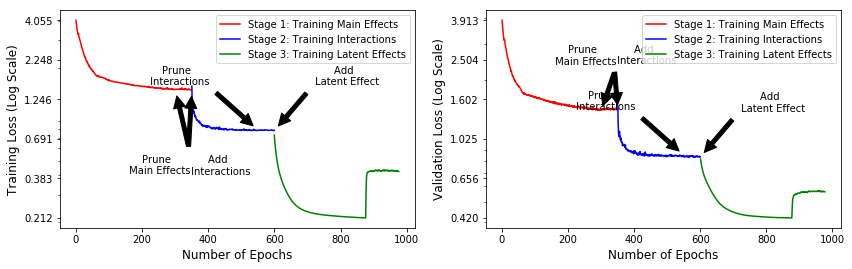

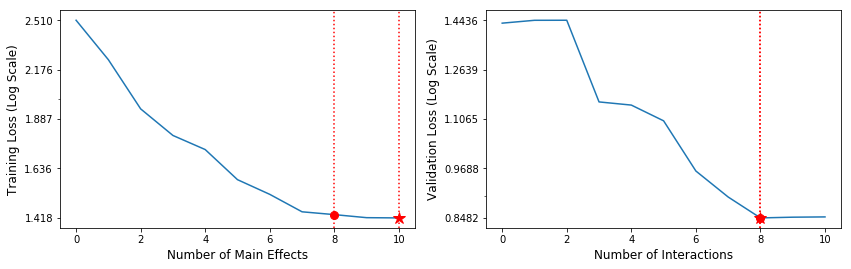

In [7]:
simu_dir = 'result'
data_dict_logs = model.final_gam_model.summary_logs(save_dict=False)
data_dict_logs.update({"err_train_mf":model.final_mf_model.mf_mae,
                       "err_val_mf":model.final_mf_model.mf_valmae})
plot_trajectory(data_dict_logs, folder=simu_dir, name="s1_traj_plot", log_scale=True, save_png=True, save_eps=False)
#plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=True, save_eps=False)
plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=True, save_eps=False)

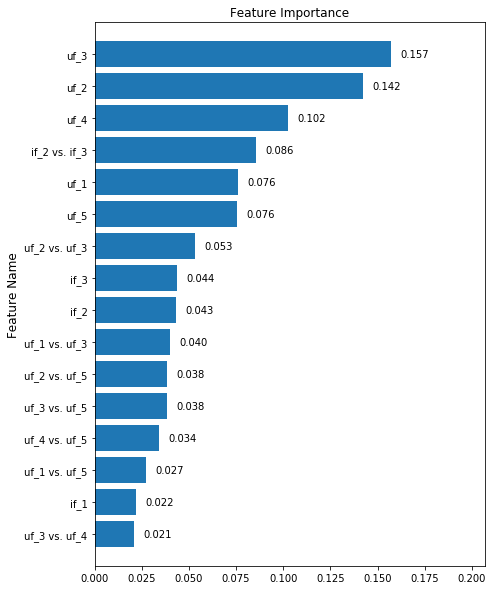

In [8]:
data_dict = model.final_gam_model.global_explain(0,save_dict=False)
feature_importance_visualize(data_dict, save_png=True, folder=simu_dir, name='s1_feature')

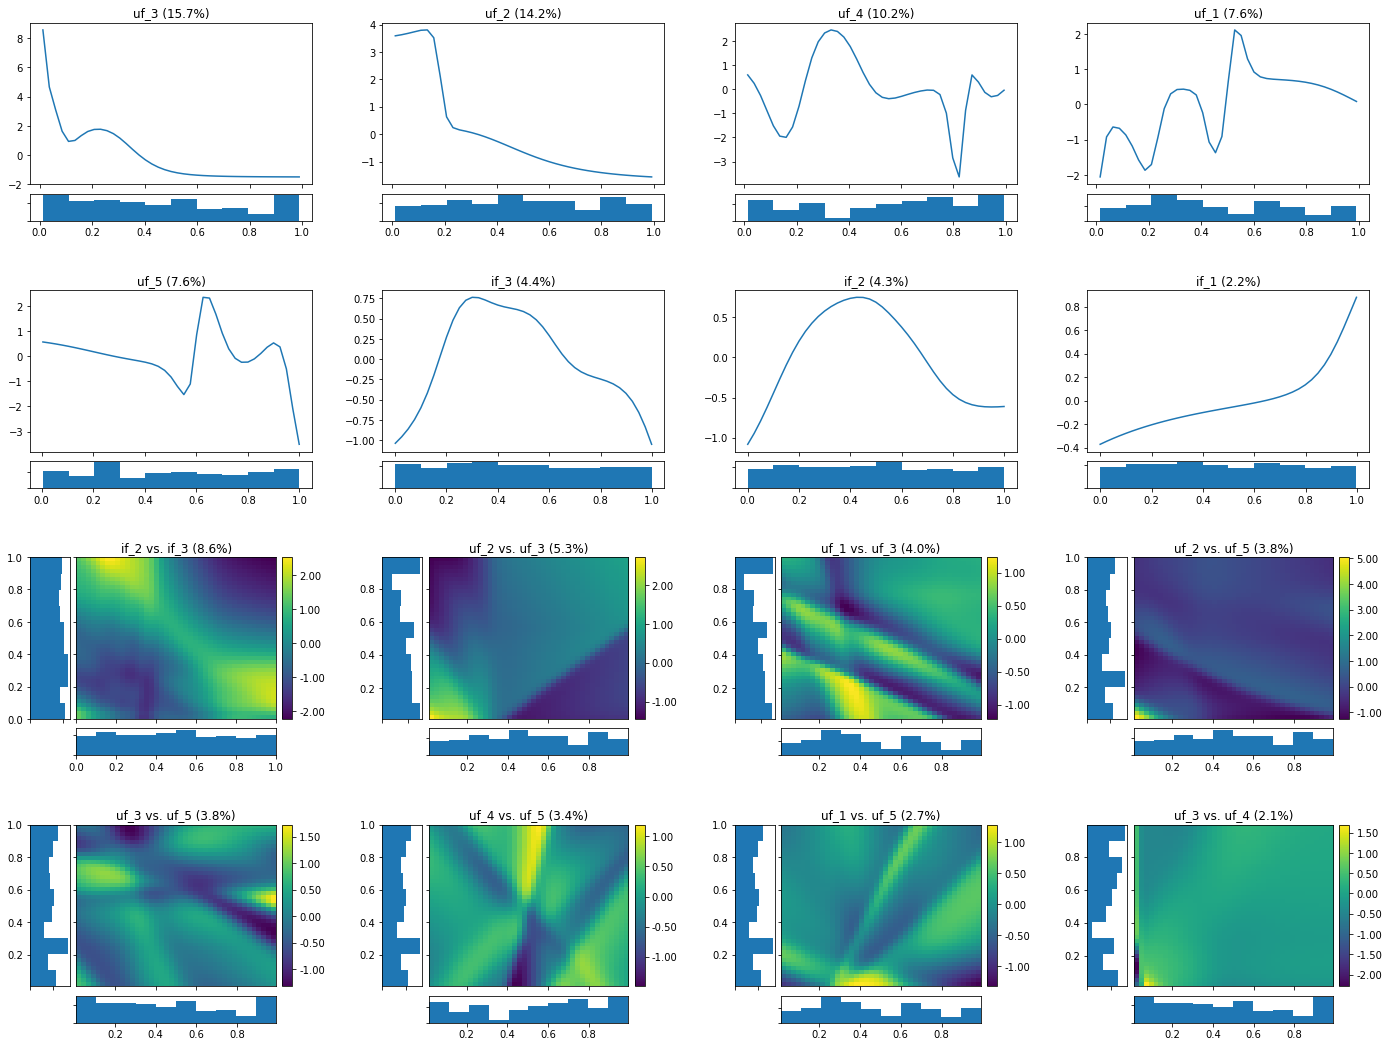

In [9]:
global_visualize_density(data_dict, save_png=True, folder=simu_dir, name='s1_global')

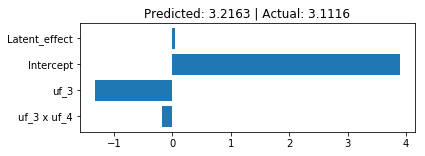

In [10]:
data_dict_local = model.local_explain(0,10,tr_x,tr_Xi,tr_y)
local_visualize(data_dict_local, save_png=True, folder=simu_dir, name='s1_local')

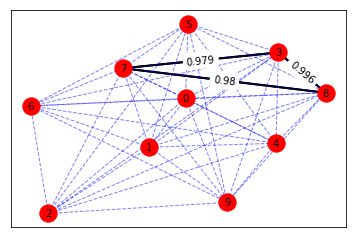

In [11]:
model.mf_distance(0.97,'user')

## Binary Classification

In [12]:
import time
import numpy as np
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from lvxnn.LVXNN import LV_XNN
from sklearn.metrics.pairwise import cosine_similarity
from gaminet.utils import local_visualize
from gaminet.utils import global_visualize_density
from gaminet.utils import feature_importance_visualize
from gaminet.utils import plot_trajectory
from gaminet.utils import plot_regularization
from sklearn.linear_model import LinearRegression
from lvxnn.DataReader import data_initialize
from collections import OrderedDict

In [13]:
data= pd.read_csv('data/simulation/sim_binary_0.9.csv')
train , test = train_test_split(data,test_size=0.2)

#list1 = data.columns
meta_info = OrderedDict()

meta_info['uf_1']={'type': 'continues','source':'user'}
meta_info['uf_2']={'type': 'continues','source':'user'}
meta_info['uf_3']={'type': 'continues','source':'user'}
meta_info['uf_4']={'type': 'continues','source':'user'}
meta_info['uf_5']={'type': 'continues','source':'user'}
meta_info['if_1']={'type': 'continues','source':'item'}
meta_info['if_2']={'type': 'continues','source':'item'}
meta_info['if_3']={'type': 'continues','source':'item'}
meta_info['if_4']={'type': 'continues','source':'item'}
meta_info['if_5']={'type': 'continues','source':'item'}
#meta_info['Occupation']={"type":"categorical"}
#meta_info['Genres']={"type":"categorical"}
#meta_info['Gender']={"type":"categorical"}
#meta_info['Age'] = {"type":"continues"}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}


tr_x, tr_Xi, tr_y , te_x , te_Xi, te_y, meta_info, model_info = data_initialize(train,test,meta_info,"Classification")

In [23]:
model = LV_XNN(model_info=model_info, meta_info=meta_info, subnet_arch=[8, 16],interact_arch=[20, 10],activation_func=tf.tanh, batch_size=1000, lr_bp=0.01, auto_tune=True,
               interaction_epochs=200,main_effect_epochs=300,tuning_epochs=50,loss_threshold_main=0.01,loss_threshold_inter=0.01,alpha=0.5,
              verbose=True,val_ratio=0.125, early_stop_thres=100,interact_num=10,u_group_num=10,i_group_num=20,scale_ratio=0.6,n_power_iterations=5,n_oversamples=0,
              mf_training_iters=20,mf_tuning_iters=20,change_mode=True,convergence_threshold=0.001,max_rank=3,shrinkage_value=20)

In [24]:
st_time = time.time()
model.fit(tr_x,tr_Xi, tr_y)
ed_time = time.time()

ListWrapper(['uf_1', 'uf_2', 'uf_3', 'uf_4', 'uf_5', 'if_1', 'if_2', 'if_3', 'if_4', 'if_5'])
####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 0.64355, val loss: 0.64236
Main effects training epoch: 2, train loss: 0.58708, val loss: 0.58339
Main effects training epoch: 3, train loss: 0.52812, val loss: 0.52217
Main effects training epoch: 4, train loss: 0.47269, val loss: 0.46933
Main effects training epoch: 5, train loss: 0.46563, val loss: 0.46368
Main effects training epoch: 6, train loss: 0.47021, val loss: 0.46629
Main effects training epoch: 7, train loss: 0.44373, val loss: 0.44277
Main effects training epoch: 8, train loss: 0.42385, val loss: 0.42113
Main effects training epoch: 9, train loss: 0.41525, val loss: 0.41379
Main effects training epoch: 10, train loss: 0.40858, val loss: 0.40649
Main effects training epoch: 11, train loss: 0.39063, val loss: 0.38902
M

Main effects training epoch: 119, train loss: 0.12980, val loss: 0.11641
Main effects training epoch: 120, train loss: 0.12861, val loss: 0.11461
Main effects training epoch: 121, train loss: 0.12917, val loss: 0.11428
Main effects training epoch: 122, train loss: 0.12765, val loss: 0.11351
Main effects training epoch: 123, train loss: 0.12956, val loss: 0.11617
Main effects training epoch: 124, train loss: 0.12709, val loss: 0.11251
Main effects training epoch: 125, train loss: 0.12878, val loss: 0.11390
Main effects training epoch: 126, train loss: 0.12639, val loss: 0.11184
Main effects training epoch: 127, train loss: 0.12757, val loss: 0.11423
Main effects training epoch: 128, train loss: 0.12718, val loss: 0.11154
Main effects training epoch: 129, train loss: 0.12716, val loss: 0.11376
Main effects training epoch: 130, train loss: 0.12673, val loss: 0.11109
Main effects training epoch: 131, train loss: 0.12604, val loss: 0.11191
Main effects training epoch: 132, train loss: 0.124

Main effects training epoch: 239, train loss: 0.11053, val loss: 0.09465
Main effects training epoch: 240, train loss: 0.11052, val loss: 0.09329
Main effects training epoch: 241, train loss: 0.11072, val loss: 0.09341
Main effects training epoch: 242, train loss: 0.11052, val loss: 0.09406
Main effects training epoch: 243, train loss: 0.11051, val loss: 0.09505
Main effects training epoch: 244, train loss: 0.11041, val loss: 0.09321
Main effects training epoch: 245, train loss: 0.11029, val loss: 0.09273
Main effects training epoch: 246, train loss: 0.11041, val loss: 0.09469
Main effects training epoch: 247, train loss: 0.11040, val loss: 0.09322
Main effects training epoch: 248, train loss: 0.10999, val loss: 0.09264
Main effects training epoch: 249, train loss: 0.10996, val loss: 0.09364
Main effects training epoch: 250, train loss: 0.10962, val loss: 0.09266
Main effects training epoch: 251, train loss: 0.10992, val loss: 0.09364
Main effects training epoch: 252, train loss: 0.109

Interaction training epoch: 6, train loss: 0.08608, val loss: 0.07461
Interaction training epoch: 7, train loss: 0.08320, val loss: 0.07159
Interaction training epoch: 8, train loss: 0.08571, val loss: 0.07376
Interaction training epoch: 9, train loss: 0.08352, val loss: 0.07172
Interaction training epoch: 10, train loss: 0.08239, val loss: 0.07449
Interaction training epoch: 11, train loss: 0.08182, val loss: 0.07113
Interaction training epoch: 12, train loss: 0.08222, val loss: 0.06865
Interaction training epoch: 13, train loss: 0.07873, val loss: 0.06796
Interaction training epoch: 14, train loss: 0.07876, val loss: 0.07376
Interaction training epoch: 15, train loss: 0.07924, val loss: 0.07152
Interaction training epoch: 16, train loss: 0.07962, val loss: 0.07551
Interaction training epoch: 17, train loss: 0.07783, val loss: 0.06799
Interaction training epoch: 18, train loss: 0.07814, val loss: 0.07201
Interaction training epoch: 19, train loss: 0.07563, val loss: 0.06848
Interactio

Interaction training epoch: 125, train loss: 0.05736, val loss: 0.05414
Interaction training epoch: 126, train loss: 0.05745, val loss: 0.05429
Interaction training epoch: 127, train loss: 0.05832, val loss: 0.05670
Interaction training epoch: 128, train loss: 0.05790, val loss: 0.05533
Interaction training epoch: 129, train loss: 0.05757, val loss: 0.05401
Interaction training epoch: 130, train loss: 0.05794, val loss: 0.05538
Interaction training epoch: 131, train loss: 0.05714, val loss: 0.05450
Interaction training epoch: 132, train loss: 0.05679, val loss: 0.05502
Interaction training epoch: 133, train loss: 0.05811, val loss: 0.05360
Interaction training epoch: 134, train loss: 0.05764, val loss: 0.05520
Interaction training epoch: 135, train loss: 0.05705, val loss: 0.05433
Interaction training epoch: 136, train loss: 0.05731, val loss: 0.05382
Interaction training epoch: 137, train loss: 0.05680, val loss: 0.05398
Interaction training epoch: 138, train loss: 0.05668, val loss: 

Interaction tuning epoch: 39, train loss: 0.05041, val loss: 0.05362
Interaction tuning epoch: 40, train loss: 0.05114, val loss: 0.05423
Interaction tuning epoch: 41, train loss: 0.05065, val loss: 0.05420
Interaction tuning epoch: 42, train loss: 0.05071, val loss: 0.05474
Interaction tuning epoch: 43, train loss: 0.05206, val loss: 0.05757
Interaction tuning epoch: 44, train loss: 0.05108, val loss: 0.05583
Interaction tuning epoch: 45, train loss: 0.05067, val loss: 0.05646
Interaction tuning epoch: 46, train loss: 0.05097, val loss: 0.05560
Interaction tuning epoch: 47, train loss: 0.05245, val loss: 0.05811
Interaction tuning epoch: 48, train loss: 0.05035, val loss: 0.05416
Interaction tuning epoch: 49, train loss: 0.05086, val loss: 0.05600
Interaction tuning epoch: 50, train loss: 0.05081, val loss: 0.05580
####################GAMI-Net training finished.####################
time cost: 35.951690912246704
After the gam stage, training error is 0.05081 , validation error is 0.055

[SoftImpute] Iter 12: observed BCE=0.033621 validation BCE=0.054621,rank=3
[SoftImpute] Iter 13: observed BCE=0.034645 validation BCE=0.054692,rank=3
[SoftImpute] Iter 14: observed BCE=0.034392 validation BCE=0.054771,rank=3
[SoftImpute] Iter 15: observed BCE=0.034188 validation BCE=0.054860,rank=3
[SoftImpute] Iter 16: observed BCE=0.034024 validation BCE=0.054958,rank=3
[SoftImpute] Iter 17: observed BCE=0.033896 validation BCE=0.055065,rank=3
[SoftImpute] Iter 18: observed BCE=0.033799 validation BCE=0.055184,rank=3
[SoftImpute] Iter 19: observed BCE=0.033737 validation BCE=0.055315,rank=3
[SoftImpute] Iter 20: observed BCE=0.033707 validation BCE=0.055450,rank=3
######start tuning######
[SoftImpute] Iter 1: observed BCE=0.038695 validation BCE=0.054191,rank=3
[SoftImpute] Iter 2: observed BCE=0.042980 validation BCE=0.054158,rank=3
[SoftImpute] Iter 3: observed BCE=0.044522 validation BCE=0.054371,rank=3
[SoftImpute] Iter 4: observed BCE=0.044815 validation BCE=0.054303,rank=3
[Sof

[SoftImpute] Iter 20: observed BCE=0.041602 validation BCE=0.058071,rank=3
[SoftImpute] Stopped after iteration 20 for lambda=0.045919
change mode state : True
[SoftImpute] Max Singular Value of X_init = 2.295974
#####mf_training#####
[SoftImpute] Iter 1: observed BCE=0.044564 validation BCE=0.055596,rank=3
[SoftImpute] Iter 2: observed BCE=0.041344 validation BCE=0.055243,rank=3
[SoftImpute] Iter 3: observed BCE=0.039081 validation BCE=0.054890,rank=3
[SoftImpute] Iter 4: observed BCE=0.037390 validation BCE=0.054613,rank=3
[SoftImpute] Iter 5: observed BCE=0.036091 validation BCE=0.054499,rank=3
[SoftImpute] Iter 6: observed BCE=0.035111 validation BCE=0.054443,rank=3
[SoftImpute] Iter 7: observed BCE=0.035901 validation BCE=0.054435,rank=3
[SoftImpute] Iter 8: observed BCE=0.035173 validation BCE=0.054445,rank=3
[SoftImpute] Iter 9: observed BCE=0.034582 validation BCE=0.054463,rank=3
[SoftImpute] Iter 10: observed BCE=0.034116 validation BCE=0.054500,rank=3
[SoftImpute] Iter 11: ob

[SoftImpute] Iter 6: observed BCE=0.044903 validation BCE=0.054283,rank=3
[SoftImpute] Iter 7: observed BCE=0.044907 validation BCE=0.054271,rank=3
[SoftImpute] Iter 8: observed BCE=0.044800 validation BCE=0.054371,rank=3
[SoftImpute] Iter 9: observed BCE=0.044796 validation BCE=0.054344,rank=3
[SoftImpute] Iter 10: observed BCE=0.044662 validation BCE=0.054255,rank=3
[SoftImpute] Iter 11: observed BCE=0.044620 validation BCE=0.054300,rank=3
[SoftImpute] Iter 12: observed BCE=0.044551 validation BCE=0.054223,rank=3
[SoftImpute] Iter 13: observed BCE=0.044624 validation BCE=0.054204,rank=3
[SoftImpute] Iter 14: observed BCE=0.044580 validation BCE=0.054278,rank=3
[SoftImpute] Iter 15: observed BCE=0.044502 validation BCE=0.054294,rank=3
[SoftImpute] Iter 16: observed BCE=0.044602 validation BCE=0.054245,rank=3
[SoftImpute] Iter 17: observed BCE=0.044508 validation BCE=0.054348,rank=3
[SoftImpute] Iter 18: observed BCE=0.044415 validation BCE=0.054337,rank=3
[SoftImpute] Iter 19: observe

[SoftImpute] Iter 9: observed BCE=0.034582 validation BCE=0.054463,rank=3
[SoftImpute] Iter 10: observed BCE=0.034116 validation BCE=0.054500,rank=3
[SoftImpute] Iter 11: observed BCE=0.033766 validation BCE=0.054557,rank=3
[SoftImpute] Iter 12: observed BCE=0.033621 validation BCE=0.054621,rank=3
[SoftImpute] Iter 13: observed BCE=0.034645 validation BCE=0.054692,rank=3
[SoftImpute] Iter 14: observed BCE=0.034392 validation BCE=0.054771,rank=3
[SoftImpute] Iter 15: observed BCE=0.034188 validation BCE=0.054860,rank=3
[SoftImpute] Iter 16: observed BCE=0.034024 validation BCE=0.054958,rank=3
[SoftImpute] Iter 17: observed BCE=0.033896 validation BCE=0.055065,rank=3
[SoftImpute] Iter 18: observed BCE=0.033799 validation BCE=0.055184,rank=3
[SoftImpute] Iter 19: observed BCE=0.033737 validation BCE=0.055315,rank=3
[SoftImpute] Iter 20: observed BCE=0.033707 validation BCE=0.055450,rank=3
######start tuning######
[SoftImpute] Iter 1: observed BCE=0.038695 validation BCE=0.054191,rank=3
[S

[SoftImpute] Iter 16: observed BCE=0.041378 validation BCE=0.053643,rank=3
[SoftImpute] Iter 17: observed BCE=0.041142 validation BCE=0.053447,rank=3
[SoftImpute] Iter 18: observed BCE=0.041294 validation BCE=0.053504,rank=3
[SoftImpute] Iter 19: observed BCE=0.041114 validation BCE=0.053262,rank=3
[SoftImpute] Iter 20: observed BCE=0.041213 validation BCE=0.053721,rank=3
[SoftImpute] Stopped after iteration 20 for lambda=0.045919
change mode state : True
[SoftImpute] Max Singular Value of X_init = 2.295974
#####mf_training#####
[SoftImpute] Iter 1: observed BCE=0.044564 validation BCE=0.055596,rank=3
[SoftImpute] Iter 2: observed BCE=0.041344 validation BCE=0.055243,rank=3
[SoftImpute] Iter 3: observed BCE=0.039081 validation BCE=0.054890,rank=3
[SoftImpute] Iter 4: observed BCE=0.037390 validation BCE=0.054613,rank=3
[SoftImpute] Iter 5: observed BCE=0.036091 validation BCE=0.054499,rank=3
[SoftImpute] Iter 6: observed BCE=0.035111 validation BCE=0.054443,rank=3
[SoftImpute] Iter 7: 

[SoftImpute] Iter 2: observed BCE=0.039310 validation BCE=0.054027,rank=3
[SoftImpute] Iter 3: observed BCE=0.040615 validation BCE=0.054120,rank=3
[SoftImpute] Iter 4: observed BCE=0.041320 validation BCE=0.053776,rank=3
[SoftImpute] Iter 5: observed BCE=0.041594 validation BCE=0.053766,rank=3
[SoftImpute] Iter 6: observed BCE=0.041553 validation BCE=0.053797,rank=3
[SoftImpute] Iter 7: observed BCE=0.041551 validation BCE=0.053563,rank=3
[SoftImpute] Iter 8: observed BCE=0.041464 validation BCE=0.053784,rank=3
[SoftImpute] Iter 9: observed BCE=0.041686 validation BCE=0.053553,rank=3
[SoftImpute] Iter 10: observed BCE=0.041437 validation BCE=0.053635,rank=3
[SoftImpute] Iter 11: observed BCE=0.041459 validation BCE=0.053562,rank=3
[SoftImpute] Iter 12: observed BCE=0.041389 validation BCE=0.053734,rank=3
[SoftImpute] Iter 13: observed BCE=0.041242 validation BCE=0.053662,rank=3
[SoftImpute] Iter 14: observed BCE=0.041276 validation BCE=0.053525,rank=3
[SoftImpute] Iter 15: observed BC

[SoftImpute] Iter 11: observed BCE=0.033766 validation BCE=0.054557,rank=3
[SoftImpute] Iter 12: observed BCE=0.033621 validation BCE=0.054621,rank=3
[SoftImpute] Iter 13: observed BCE=0.034645 validation BCE=0.054692,rank=3
[SoftImpute] Iter 14: observed BCE=0.034392 validation BCE=0.054771,rank=3
[SoftImpute] Iter 15: observed BCE=0.034188 validation BCE=0.054860,rank=3
[SoftImpute] Iter 16: observed BCE=0.034024 validation BCE=0.054958,rank=3
[SoftImpute] Iter 17: observed BCE=0.033896 validation BCE=0.055065,rank=3
[SoftImpute] Iter 18: observed BCE=0.033799 validation BCE=0.055184,rank=3
[SoftImpute] Iter 19: observed BCE=0.033737 validation BCE=0.055315,rank=3
[SoftImpute] Iter 20: observed BCE=0.033707 validation BCE=0.055450,rank=3
######start tuning######
[SoftImpute] Iter 1: observed BCE=0.036844 validation BCE=0.054313,rank=3
[SoftImpute] Iter 2: observed BCE=0.035877 validation BCE=0.054052,rank=3
[SoftImpute] Iter 3: observed BCE=0.038621 validation BCE=0.053845,rank=3
[So

[SoftImpute] Iter 17: observed BCE=0.041994 validation BCE=0.053780,rank=3
[SoftImpute] Iter 18: observed BCE=0.042130 validation BCE=0.053750,rank=3
[SoftImpute] Iter 19: observed BCE=0.041891 validation BCE=0.053906,rank=3
[SoftImpute] Iter 20: observed BCE=0.041840 validation BCE=0.053722,rank=3
[SoftImpute] Stopped after iteration 20 for lambda=0.045919
change mode state : True
time cost: 22.048083543777466
After the matrix factor stage, training error is 0.04184, validation error is 0.05372
select best model: stop at lv model


In [25]:
pred = model.predict(te_x, te_Xi)
#accuracy = accuracy_score(te_y,pred)
auc = roc_auc_score(te_y,pred)
print(auc)

0.9789057841383422


In [26]:
model.final_mf_model.best_ratio

0.6

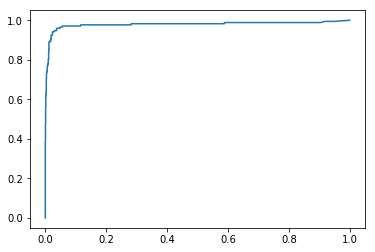

In [27]:
fpr, tpr, thresholds = roc_curve(te_y,pred)
plt.plot(fpr,tpr)

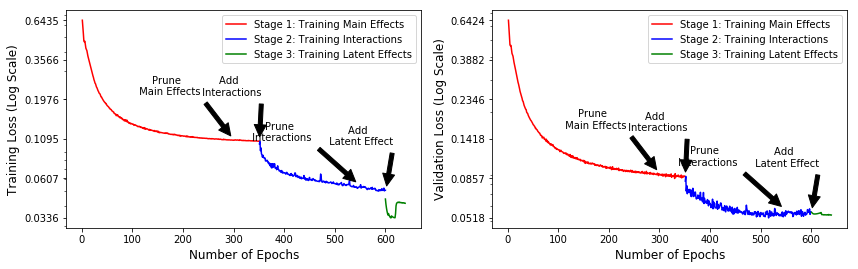

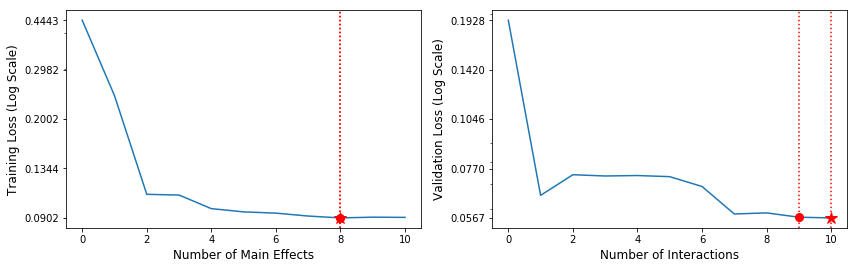

In [28]:
simu_dir = 'result'
data_dict_logs = model.final_gam_model.summary_logs(save_dict=False)
data_dict_logs.update({"err_train_mf":model.final_mf_model.mf_mae,
                       "err_val_mf":model.final_mf_model.mf_valmae})
plot_trajectory(data_dict_logs, folder=simu_dir, name="s1_traj_plot", log_scale=True, save_png=True, save_eps=False)
#plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=True, save_eps=False)
plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=True, save_eps=False)

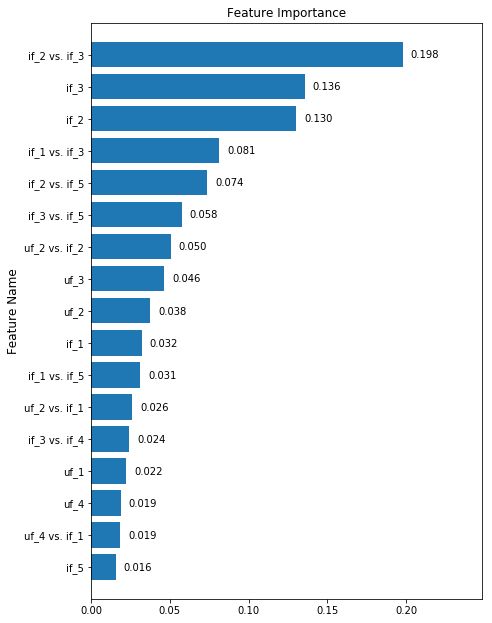

In [29]:
data_dict = model.final_gam_model.global_explain(0,save_dict=False)
feature_importance_visualize(data_dict, save_png=True, folder=simu_dir, name='s1_feature')

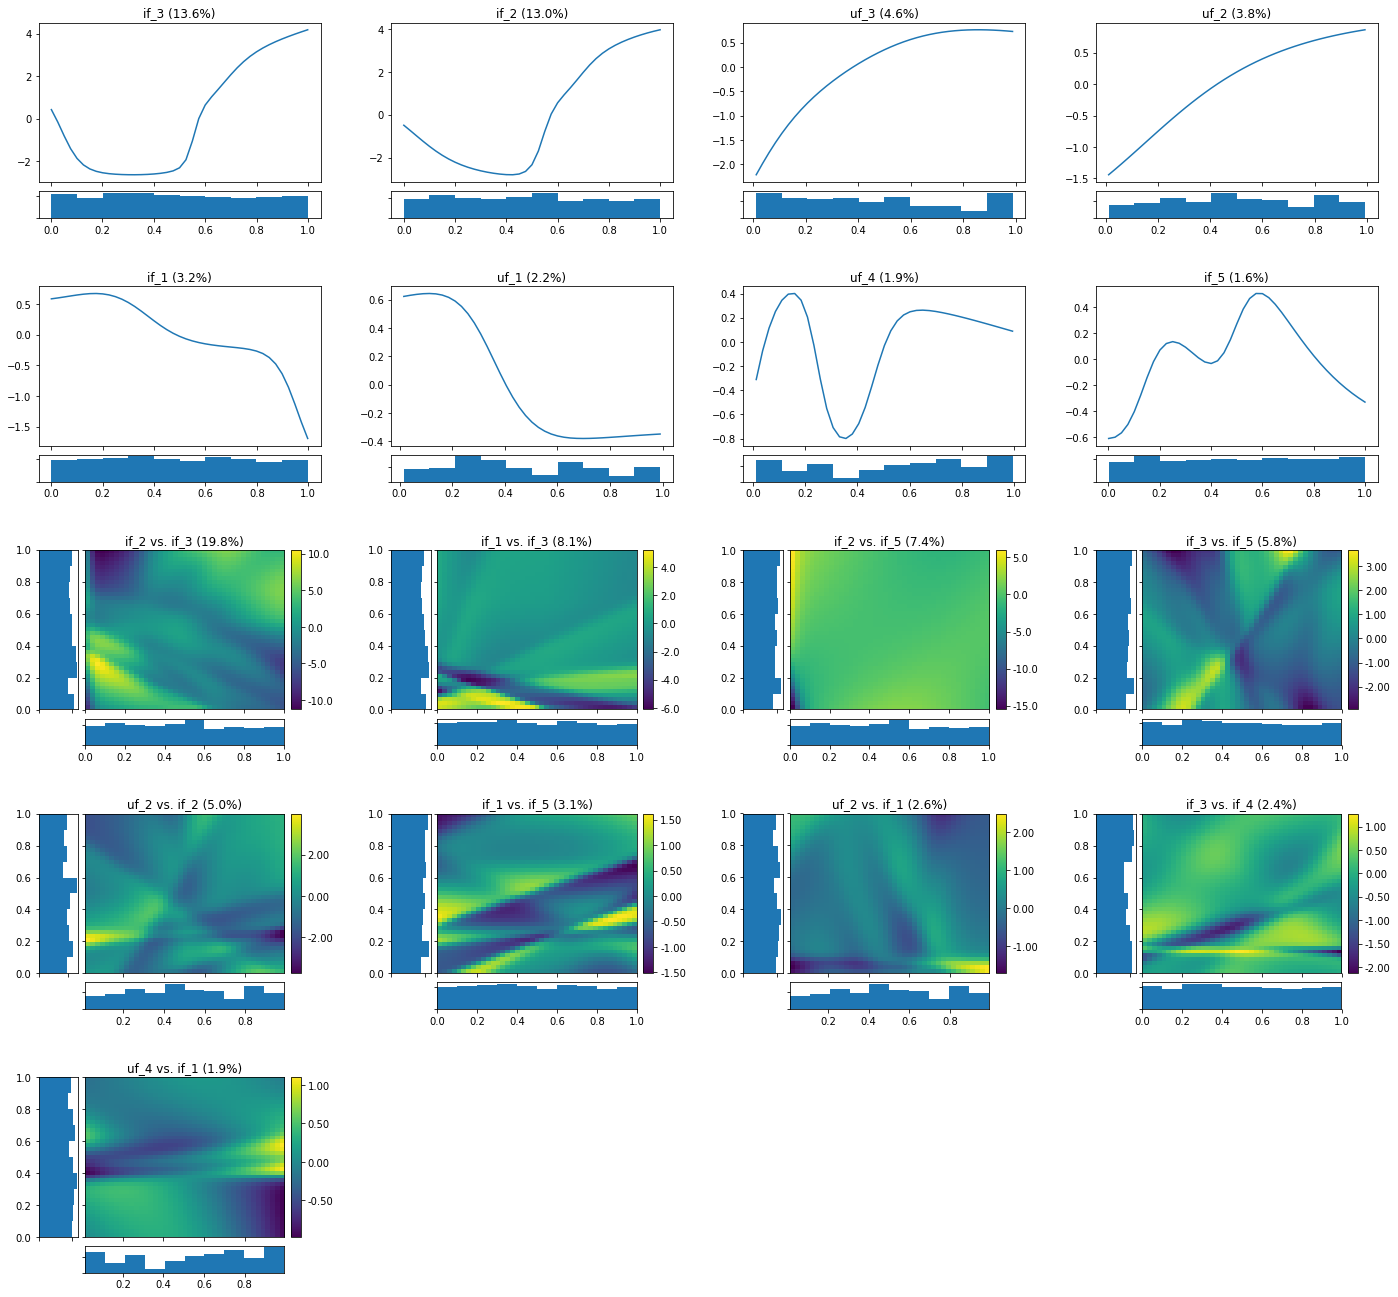

In [30]:
global_visualize_density(data_dict, save_png=True, folder=simu_dir, name='s1_global')

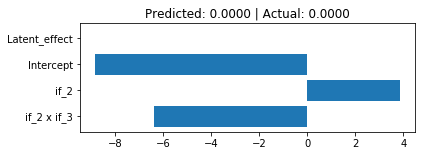

In [31]:
data_dict_local = model.local_explain(0,10,tr_x,tr_Xi,tr_y)
local_visualize(data_dict_local, save_png=True, folder=simu_dir, name='s1_local')

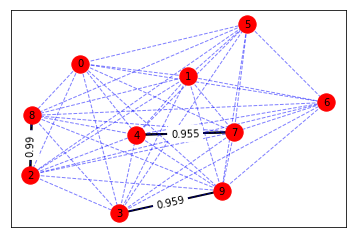

In [33]:
model.mf_distance(0.95,'user')